* ASTER TB image
* MODIS TB image
* GOES TB image
* MODIS-ASTER difference: image & histogram
* GOES-ASTER difference: image & histogram

In [1]:
import xarray as xr
import rioxarray as rxr
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

Define functions

In [3]:
def summary_stats(a, b):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    # remove nan values
    a = a[np.isnan(a)==False]
    b = b[np.isnan(b)==False]
    
    # for difference stats
    diff = b - a
    
    # for linear regression stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        'slope' : slope,
        'intercept' : intercept,
        'r_value' : r_value,
        'p_value' : p_value,
        'std_err' : std_err
        }
    
    return summary_stats_dict

In [4]:
def difference_summary_stats(diff):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    
    # for linear regression stats
    #slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        #'slope' : slope,
        #'intercept' : intercept,
        #'r_value' : r_value,
        #'p_value' : p_value,
        #'std_err' : std_err
        }
    
    return summary_stats_dict

---
Read in the ground based data timeseries for Gaylor Pit and CUES sites

In [5]:
tuol_df = pd.read_pickle('data/goes-tuolumne_2017-2020.pkl')
tuol_df['timeUTC'] = tuol_df.index + pd.Timedelta(hours=8)
tuol_df.set_index('timeUTC',inplace=True)
tuol_ds = tuol_df.to_xarray().squeeze()

In [6]:
cues_df = pd.read_pickle('data/goes-cues_2017-2020.pkl')
cues_df['timeUTC'] = cues_df.index + pd.Timedelta(hours=8)
cues_df.set_index('timeUTC',inplace=True)
cues_ds = cues_df.to_xarray().squeeze()

Set up working area geometry

In [7]:
# Larger area around Tuolumne further south and east to include Mammoth
(utm_e_UL, utm_n_UL) = 282500, 4205000
(utm_e_UR, utm_n_UR) = 305000, 4205000
(utm_e_LR, utm_n_LR) = 327500, 4160000
(utm_e_LL, utm_n_LL) = 305000, 4160000

geometry = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [utm_e_UL, utm_n_UL],
            [utm_e_UR, utm_n_UR],
            [utm_e_LR, utm_n_LR],
            [utm_e_LL, utm_n_LL]
        ]]
    }
]

Find datasets

In [8]:
#filepaths = glob.glob('/storage/spestana/output_ASTER-MODIS-GOES/*_orthorectified.nc')
filepaths = glob.glob('/storage/spestana/output_ASTER-MODIS-GOES/*_original.nc')

Open all datasets

In [9]:
ds = xr.open_mfdataset(filepaths, concat_dim='time', combine='nested')
ds = ds.rio.clip(geometry)

Export timeseries of all values at each of the two study sites.

In [10]:
gaylor_utm_e = 296649
gaylor_utm_n = 4195210
cues_utm_e = 320971
cues_utm_n = 4168153 

gaylor_timeseries = ds.sel(x=gaylor_utm_e, y=gaylor_utm_n, method='nearest').to_dataframe()
gaylor_timeseries.to_csv('goes_modis_aster_orthorectified_tb_gaylor_timeseries.csv')
cues_timeseries = ds.sel(x=cues_utm_e, y=cues_utm_n, method='nearest').to_dataframe()
cues_timeseries.to_csv('goes_modis_aster_orthorectified_tb_cues_timeseries.csv')

---

### Make plots

Looking for 2017-04-21T18:51:07.000000000
Found for CUES: 2017-04-21T18:50:00.000000000
Found for Gaylor Pit: 2017-04-21T18:45:00.000000000
Looking for 2017-05-23T18:51:10.000000000
Found for CUES: 2017-05-23T18:50:00.000000000
Found for Gaylor Pit: 2017-05-23T18:45:00.000000000
Looking for 2017-06-07T06:07:10.000000000
Found for CUES: 2017-06-07T06:05:00.000000000
Found for Gaylor Pit: 2017-06-07T06:00:00.000000000
Looking for 2017-06-07T06:07:19.000000000
Found for CUES: 2017-06-07T06:05:00.000000000
Found for Gaylor Pit: 2017-06-07T06:00:00.000000000
Looking for 2017-06-16T06:01:08.000000000
Found for CUES: 2017-06-16T06:00:00.000000000
Found for Gaylor Pit: 2017-06-16T06:00:00.000000000
Looking for 2018-03-23T18:51:27.000000000
Found for CUES: 2018-03-23T18:50:00.000000000
Found for Gaylor Pit: 2018-03-23T18:45:00.000000000
Looking for 2018-04-08T18:51:46.000000000
Found for CUES: 2018-04-08T18:50:00.000000000
Found for Gaylor Pit: 2018-04-08T18:45:00.000000000
Looking for 2018-05-

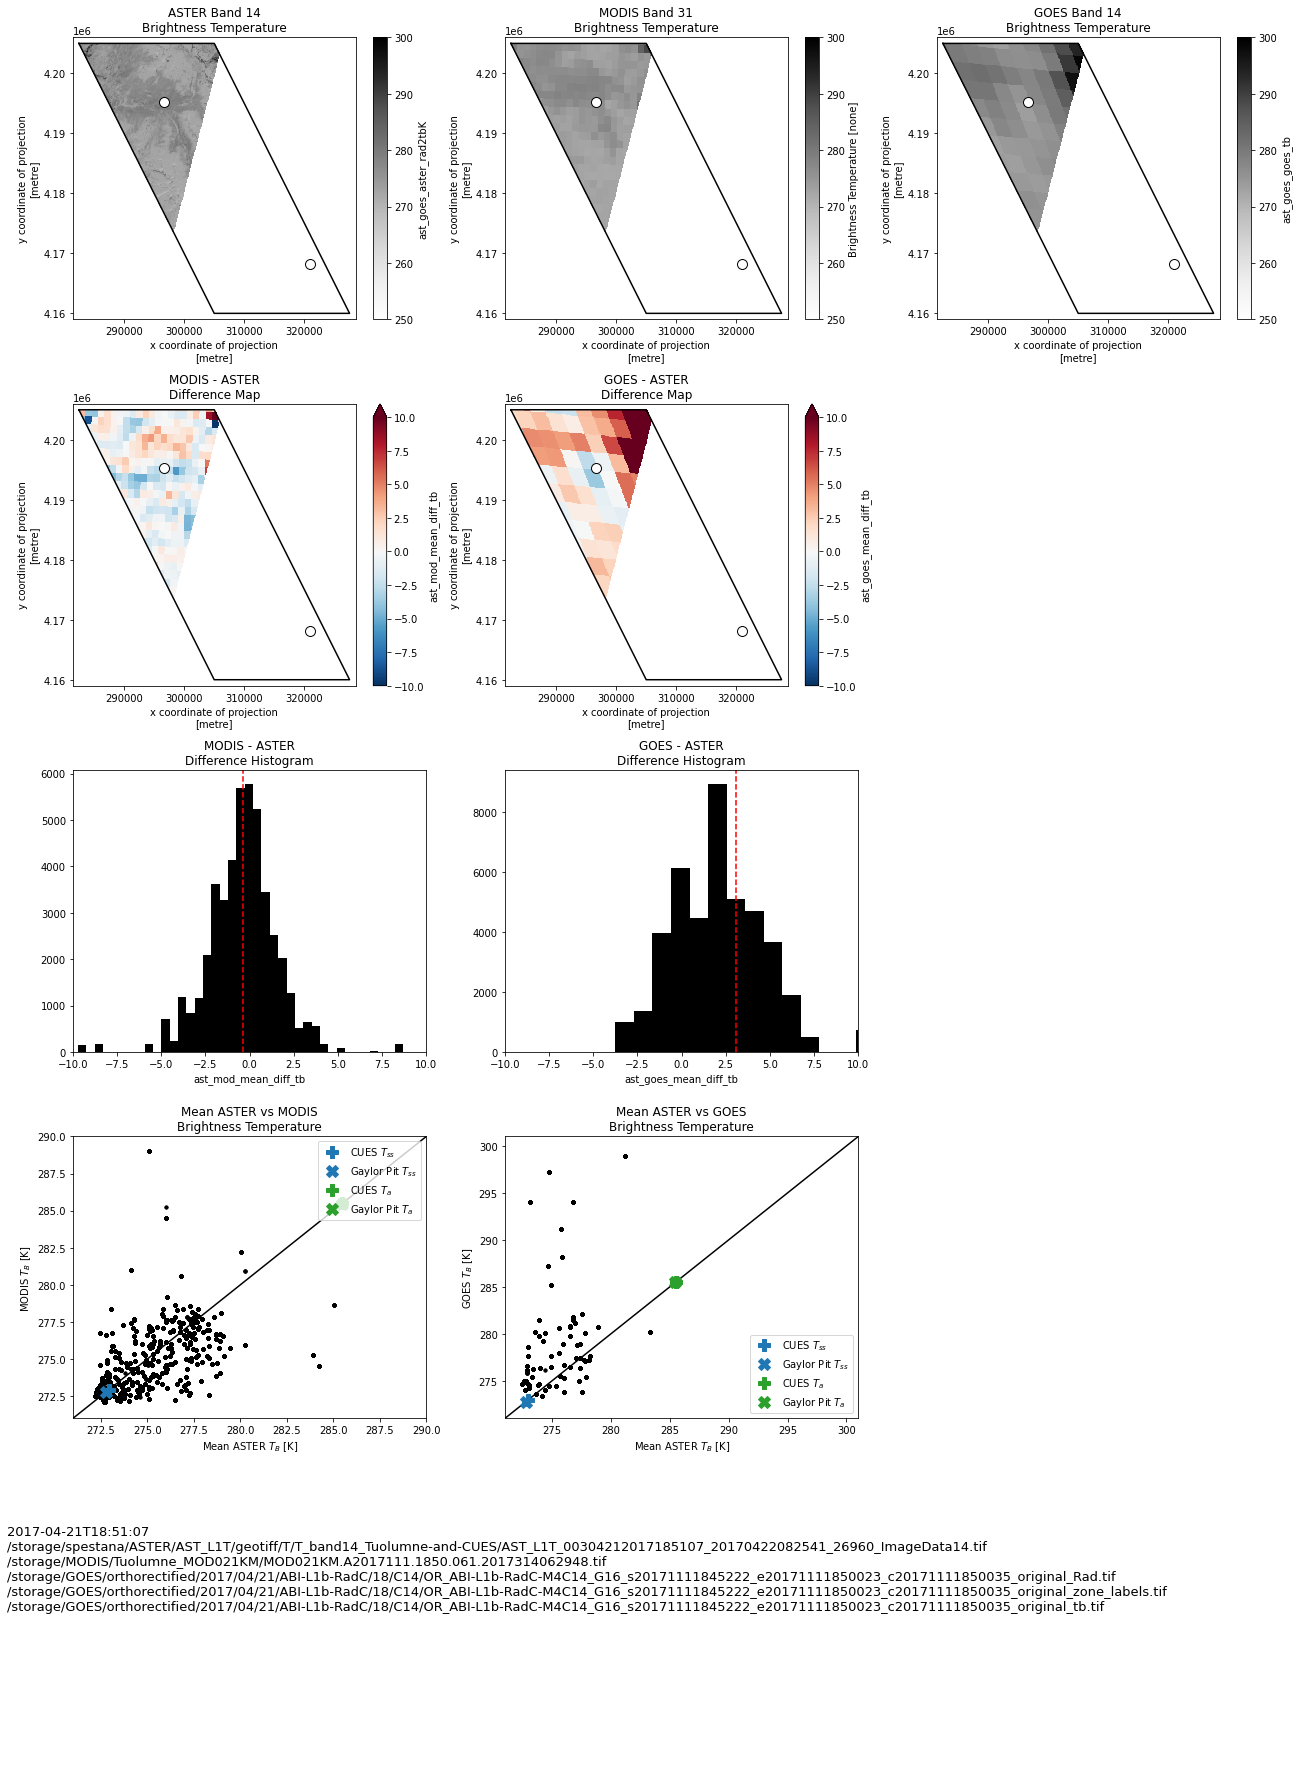

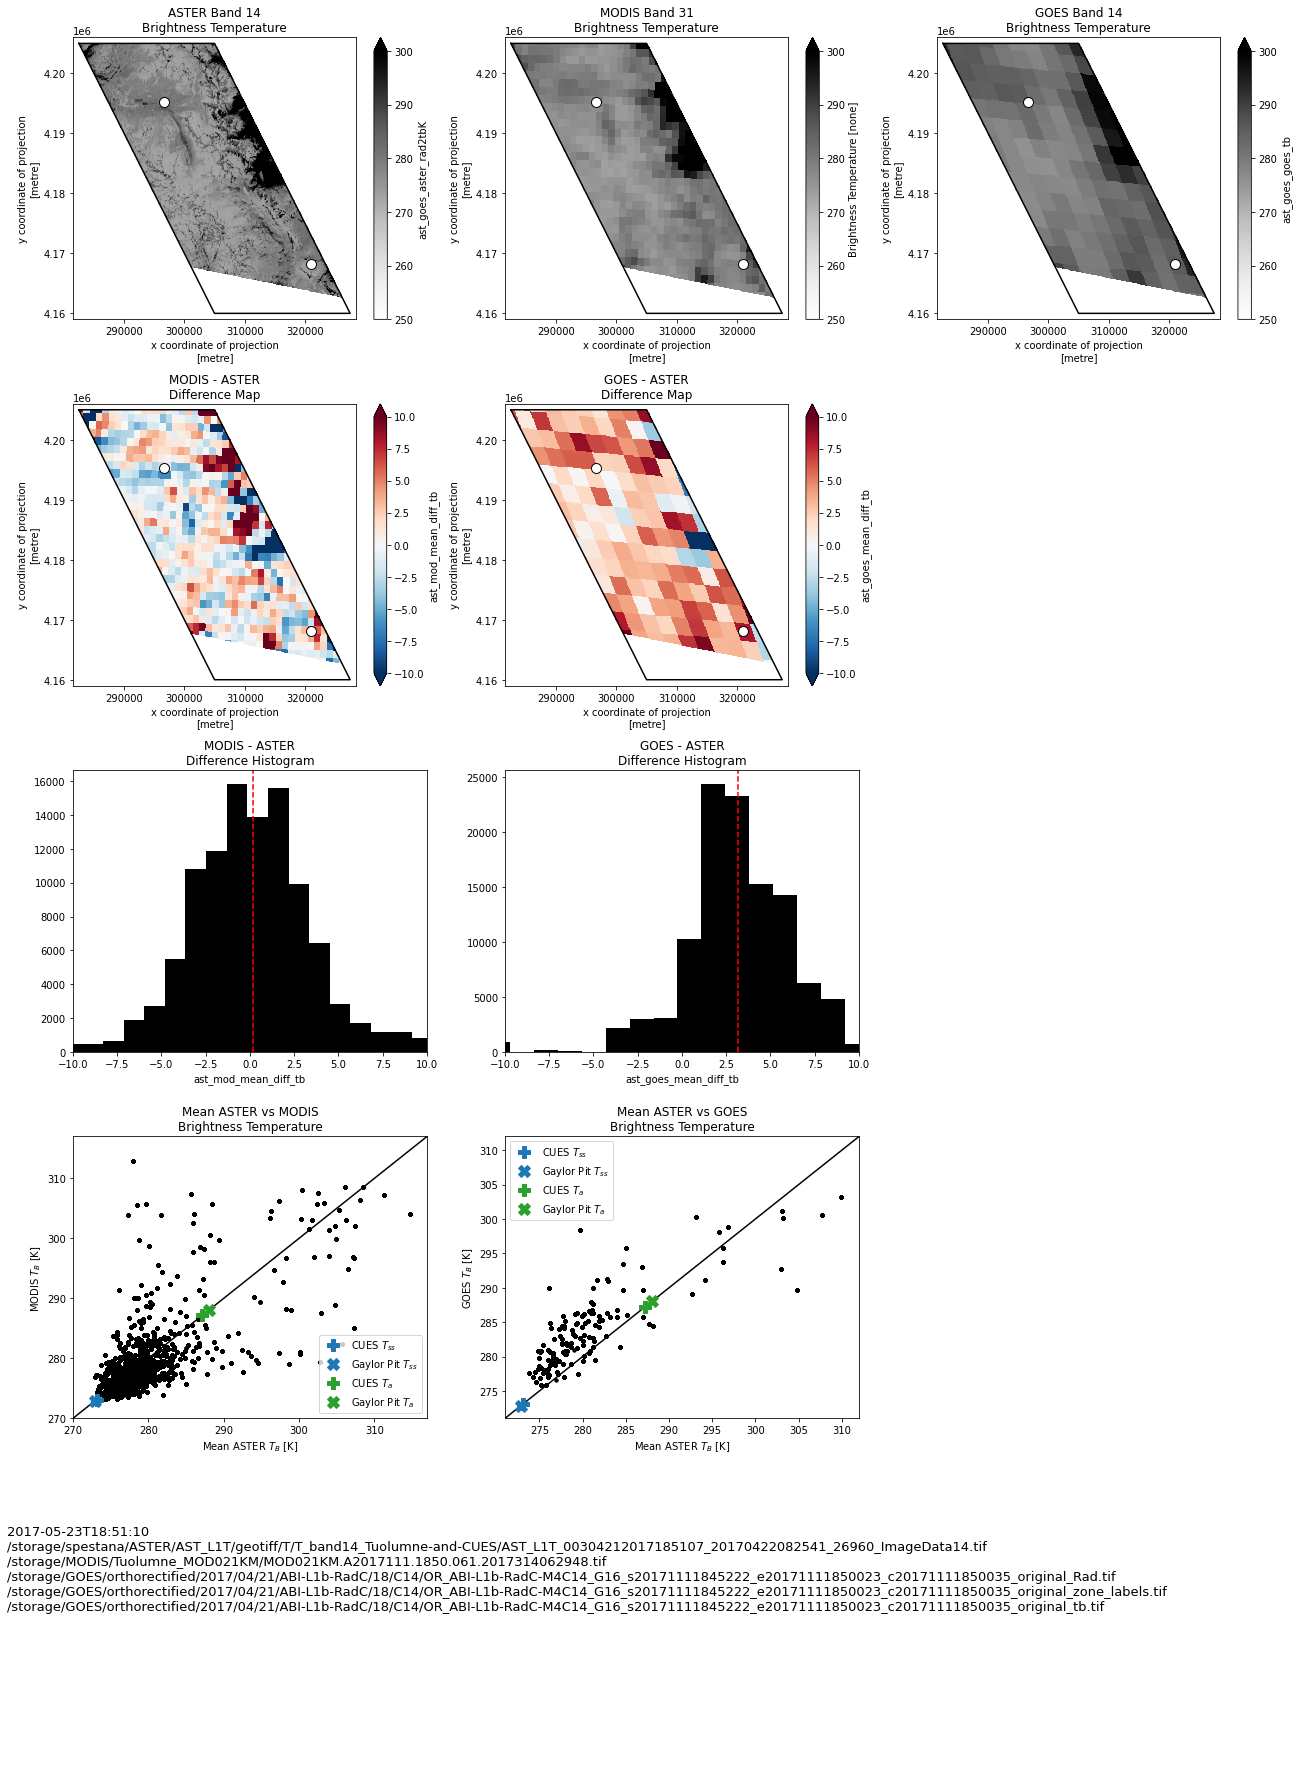

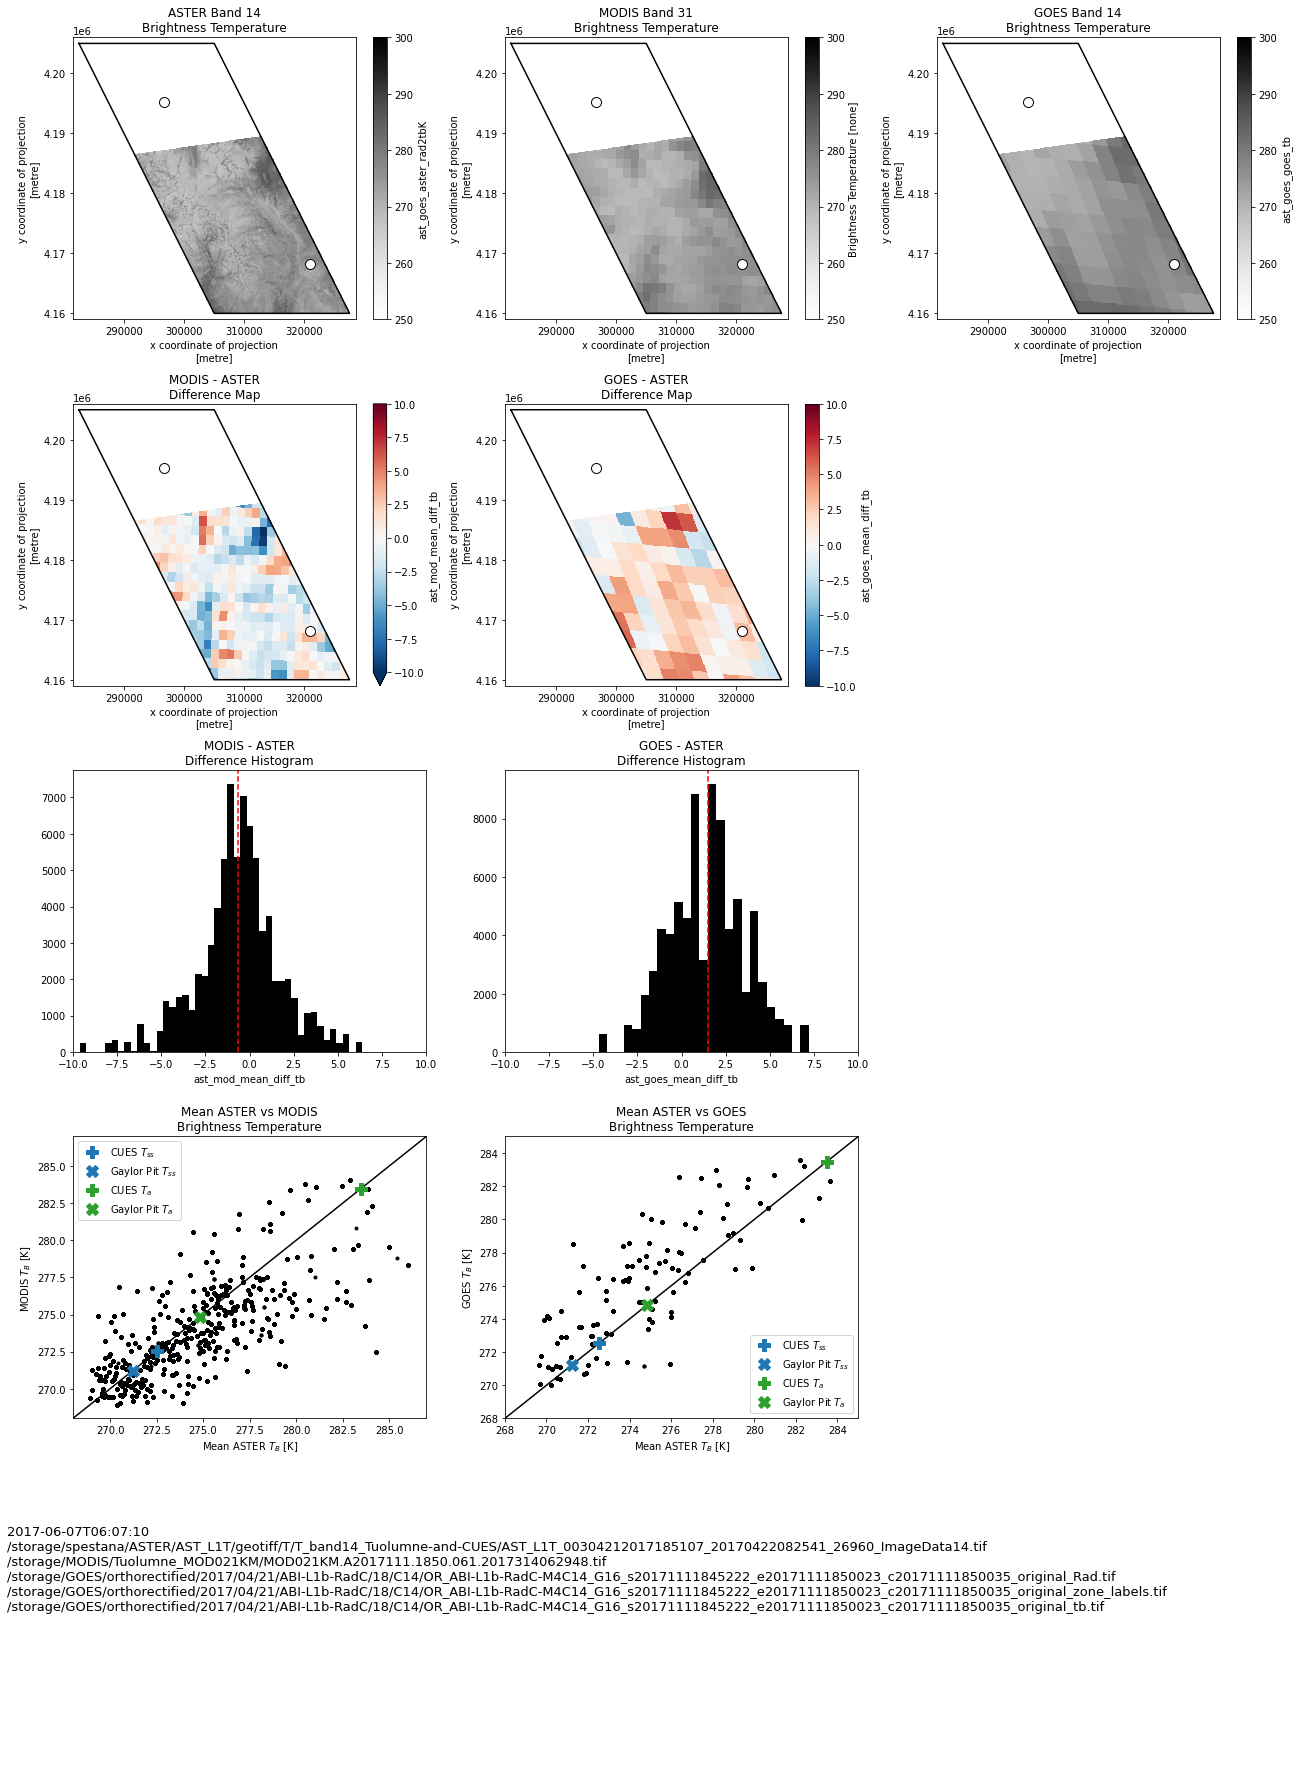

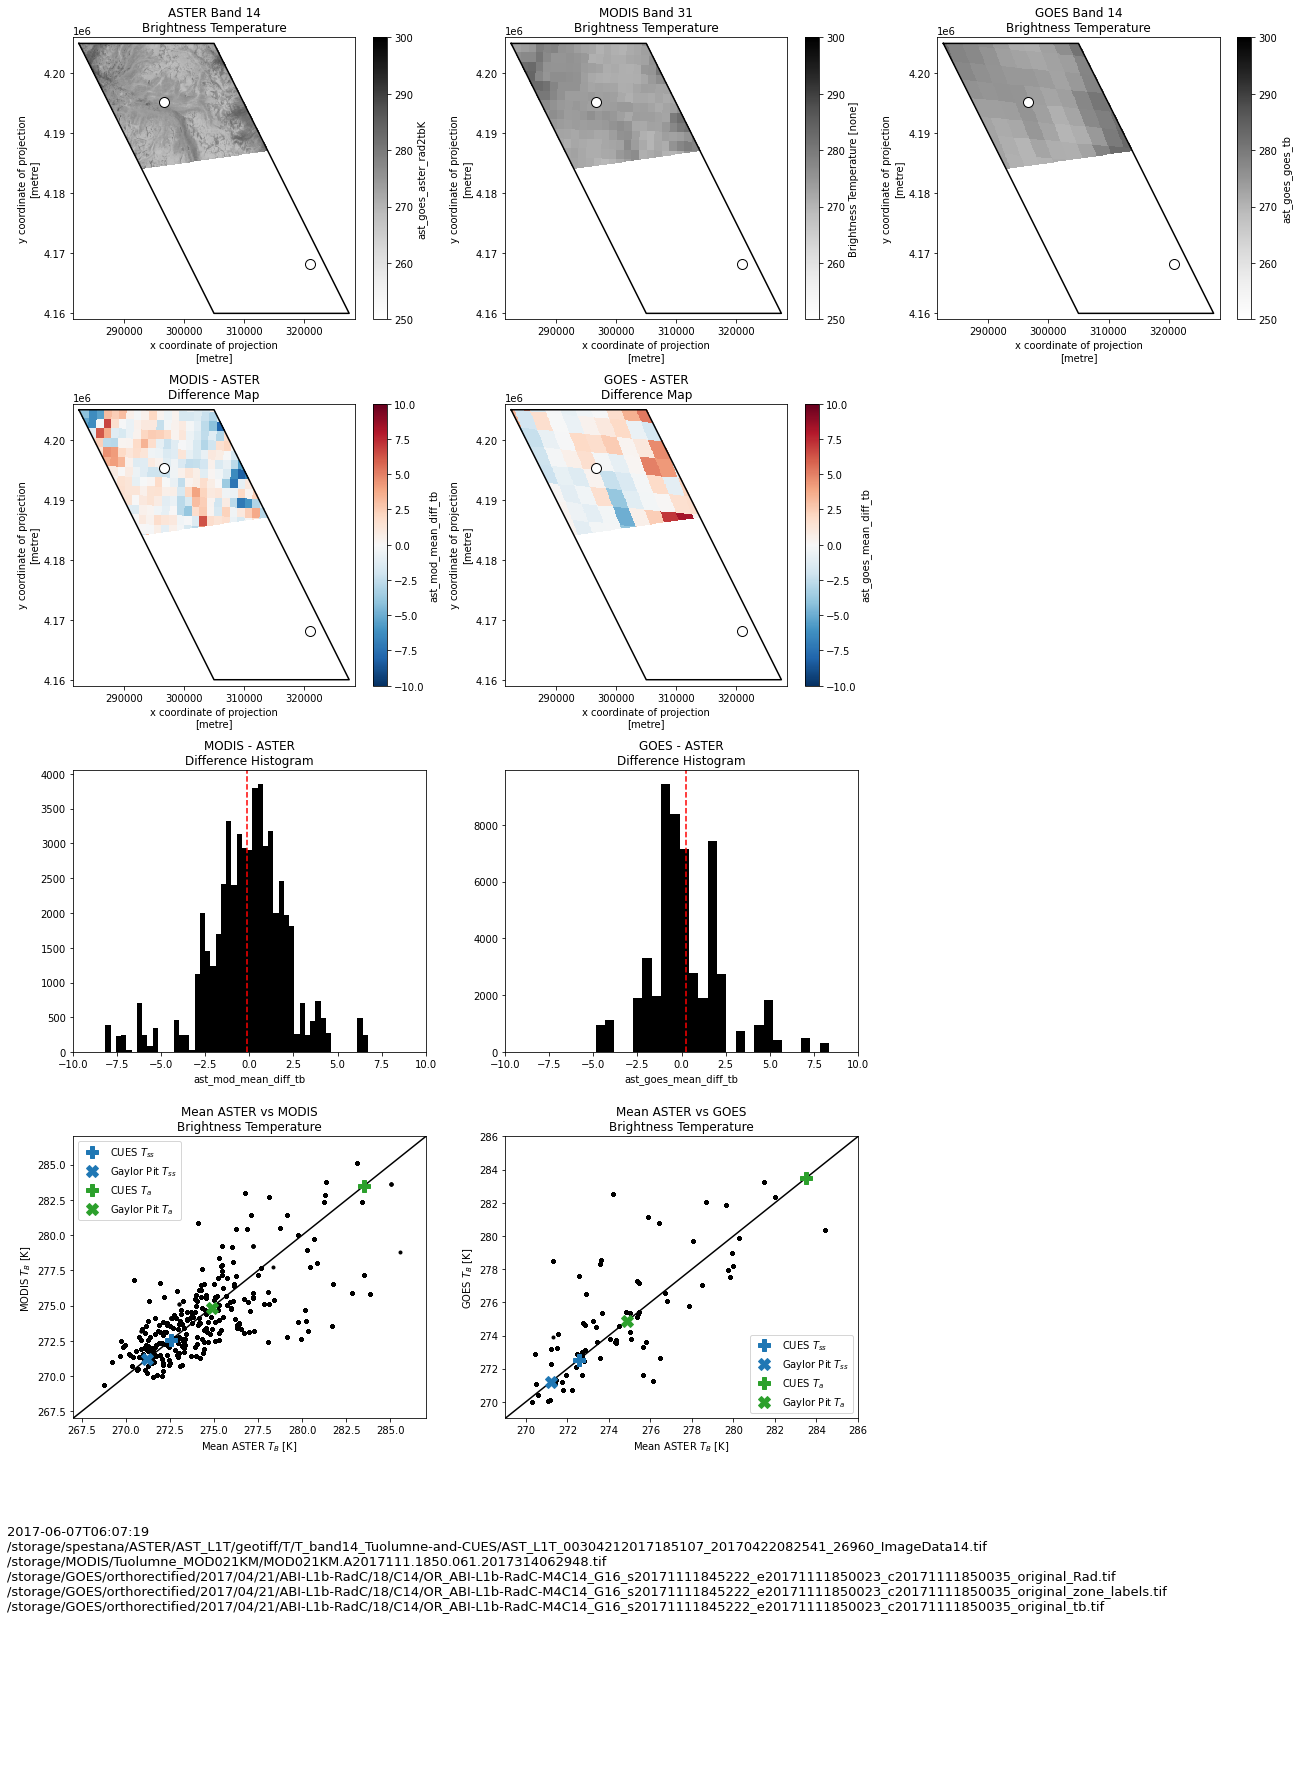

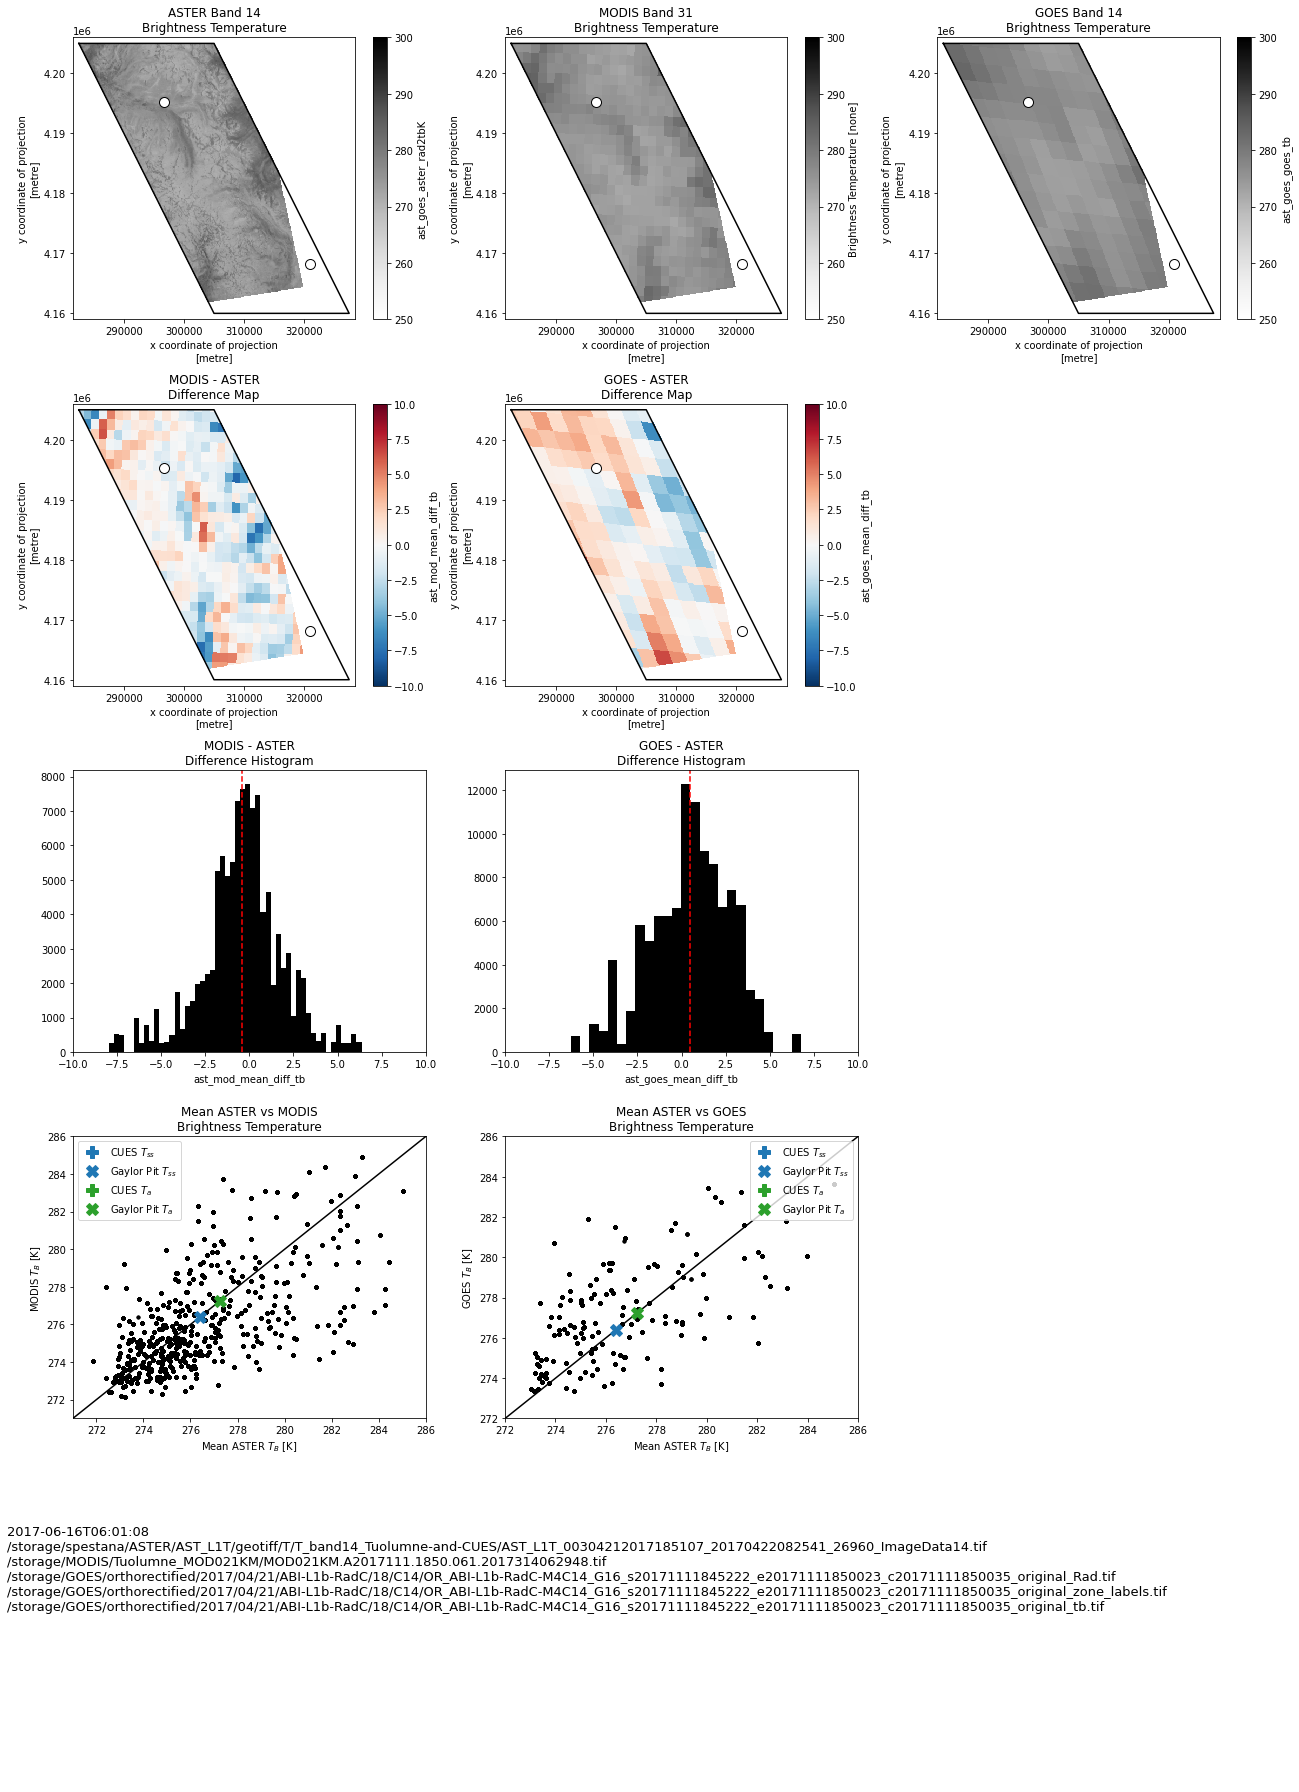

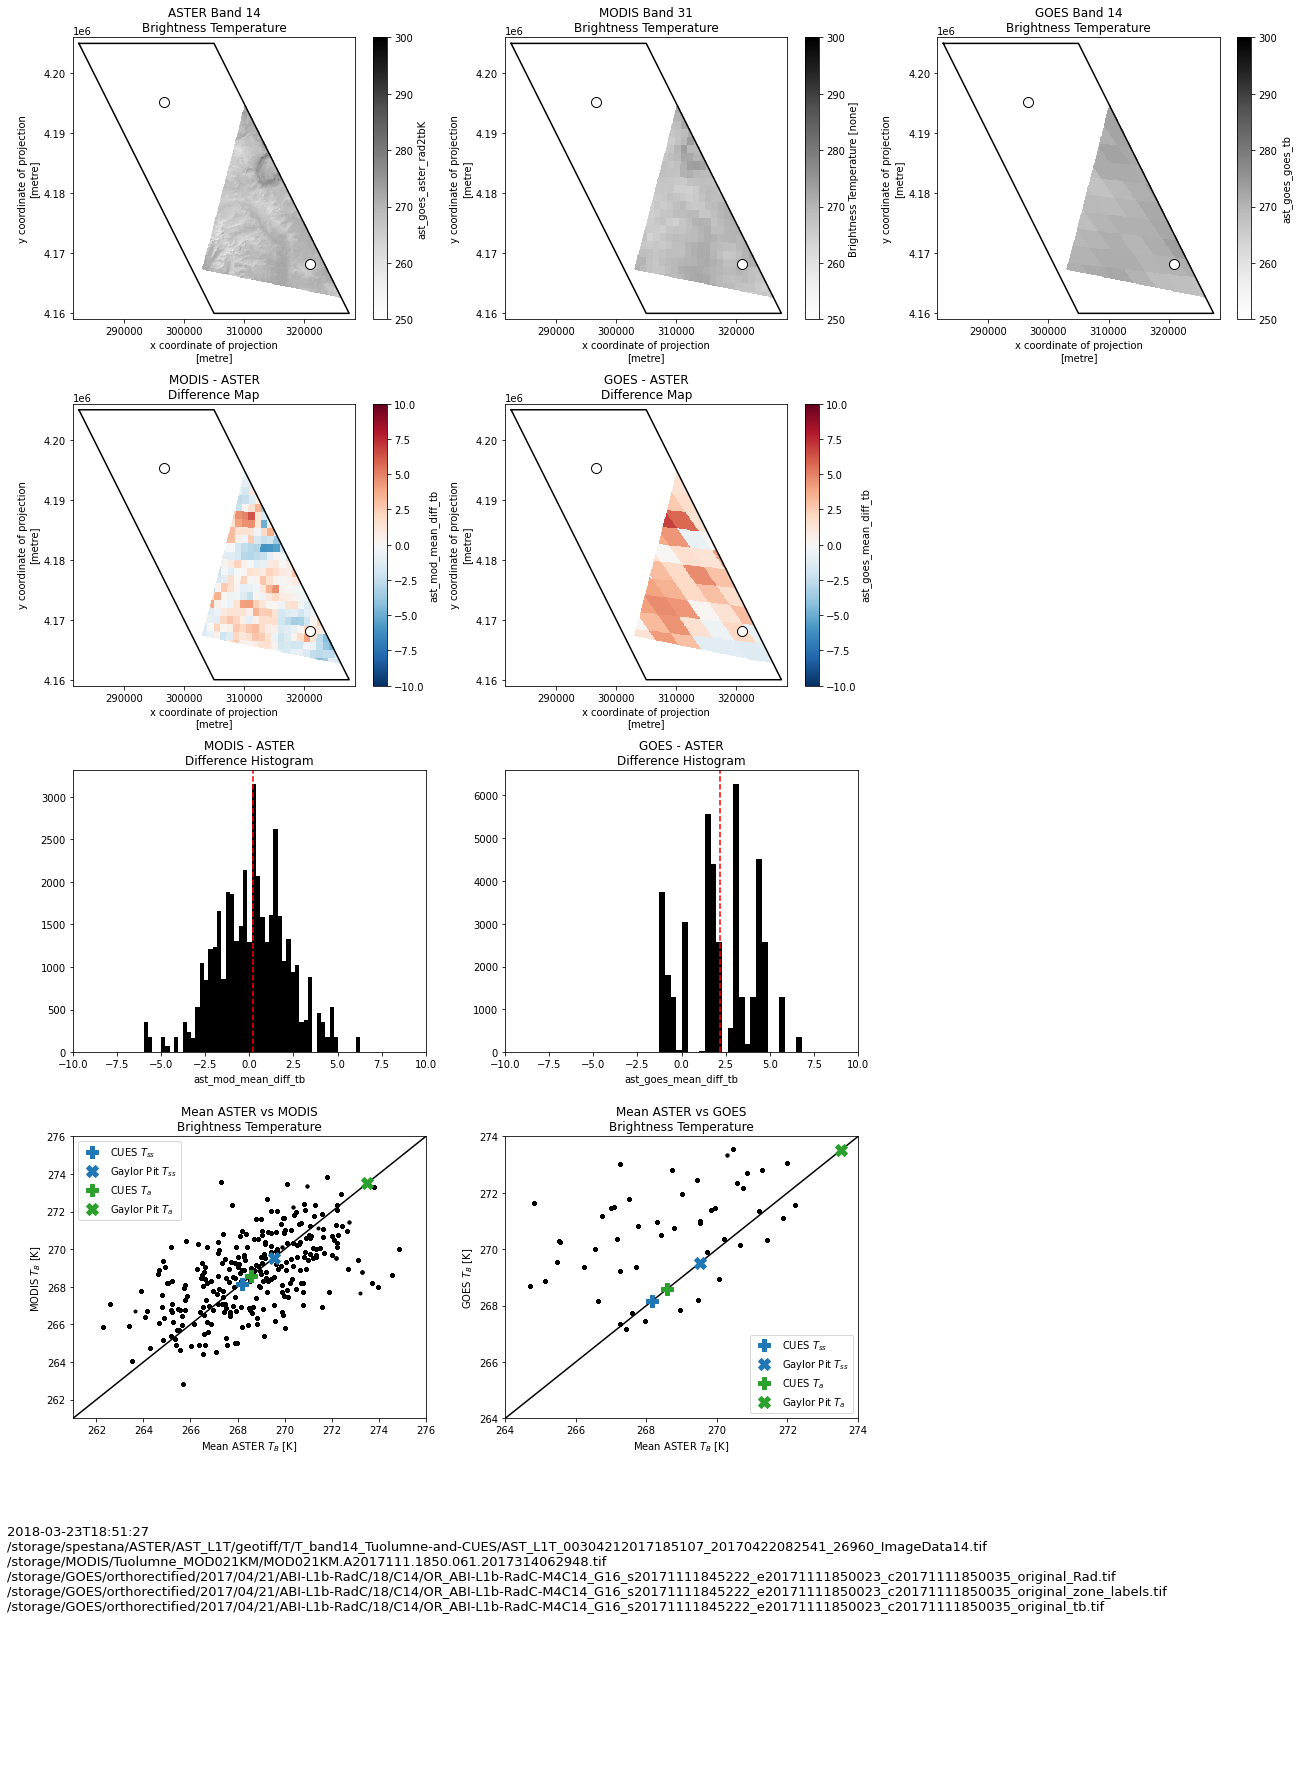

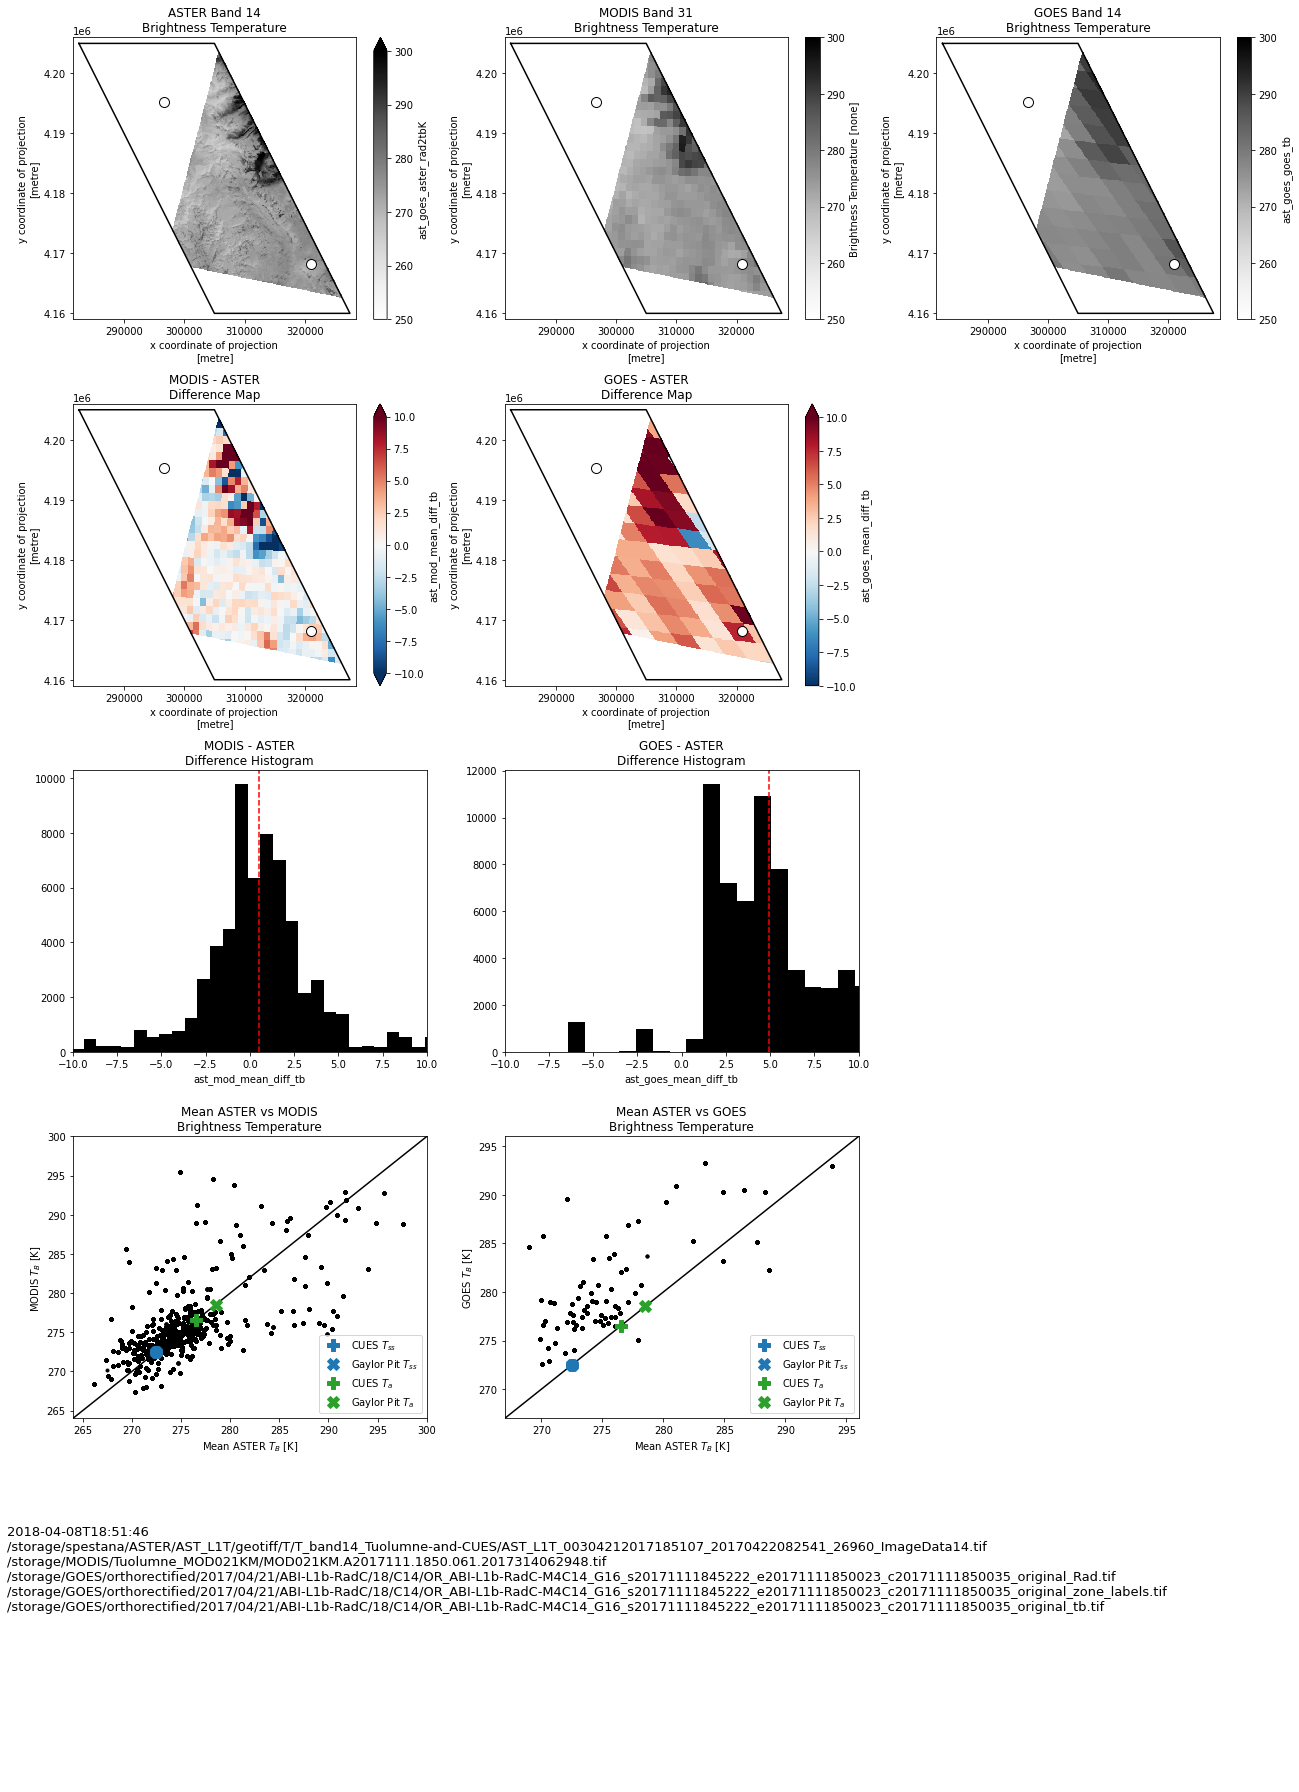

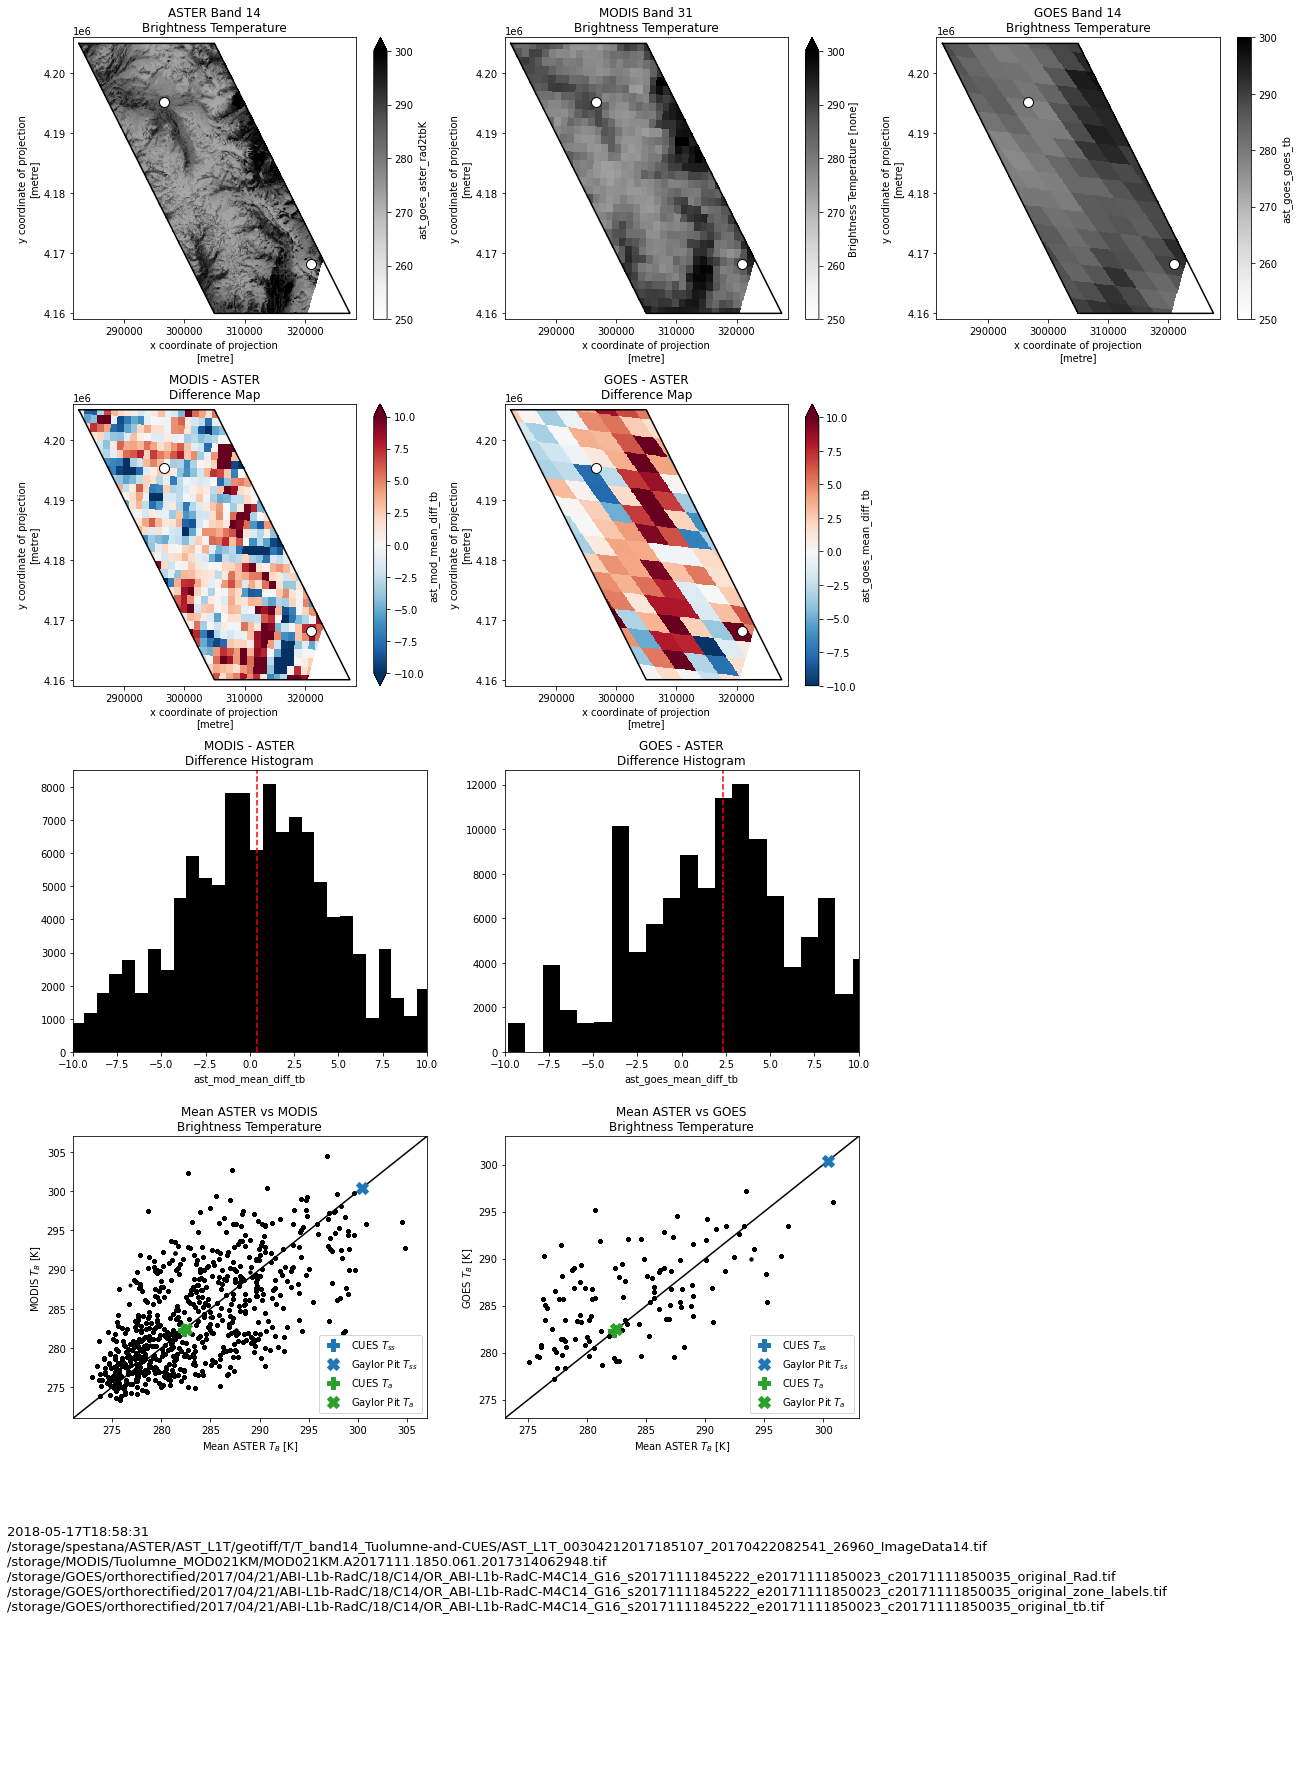

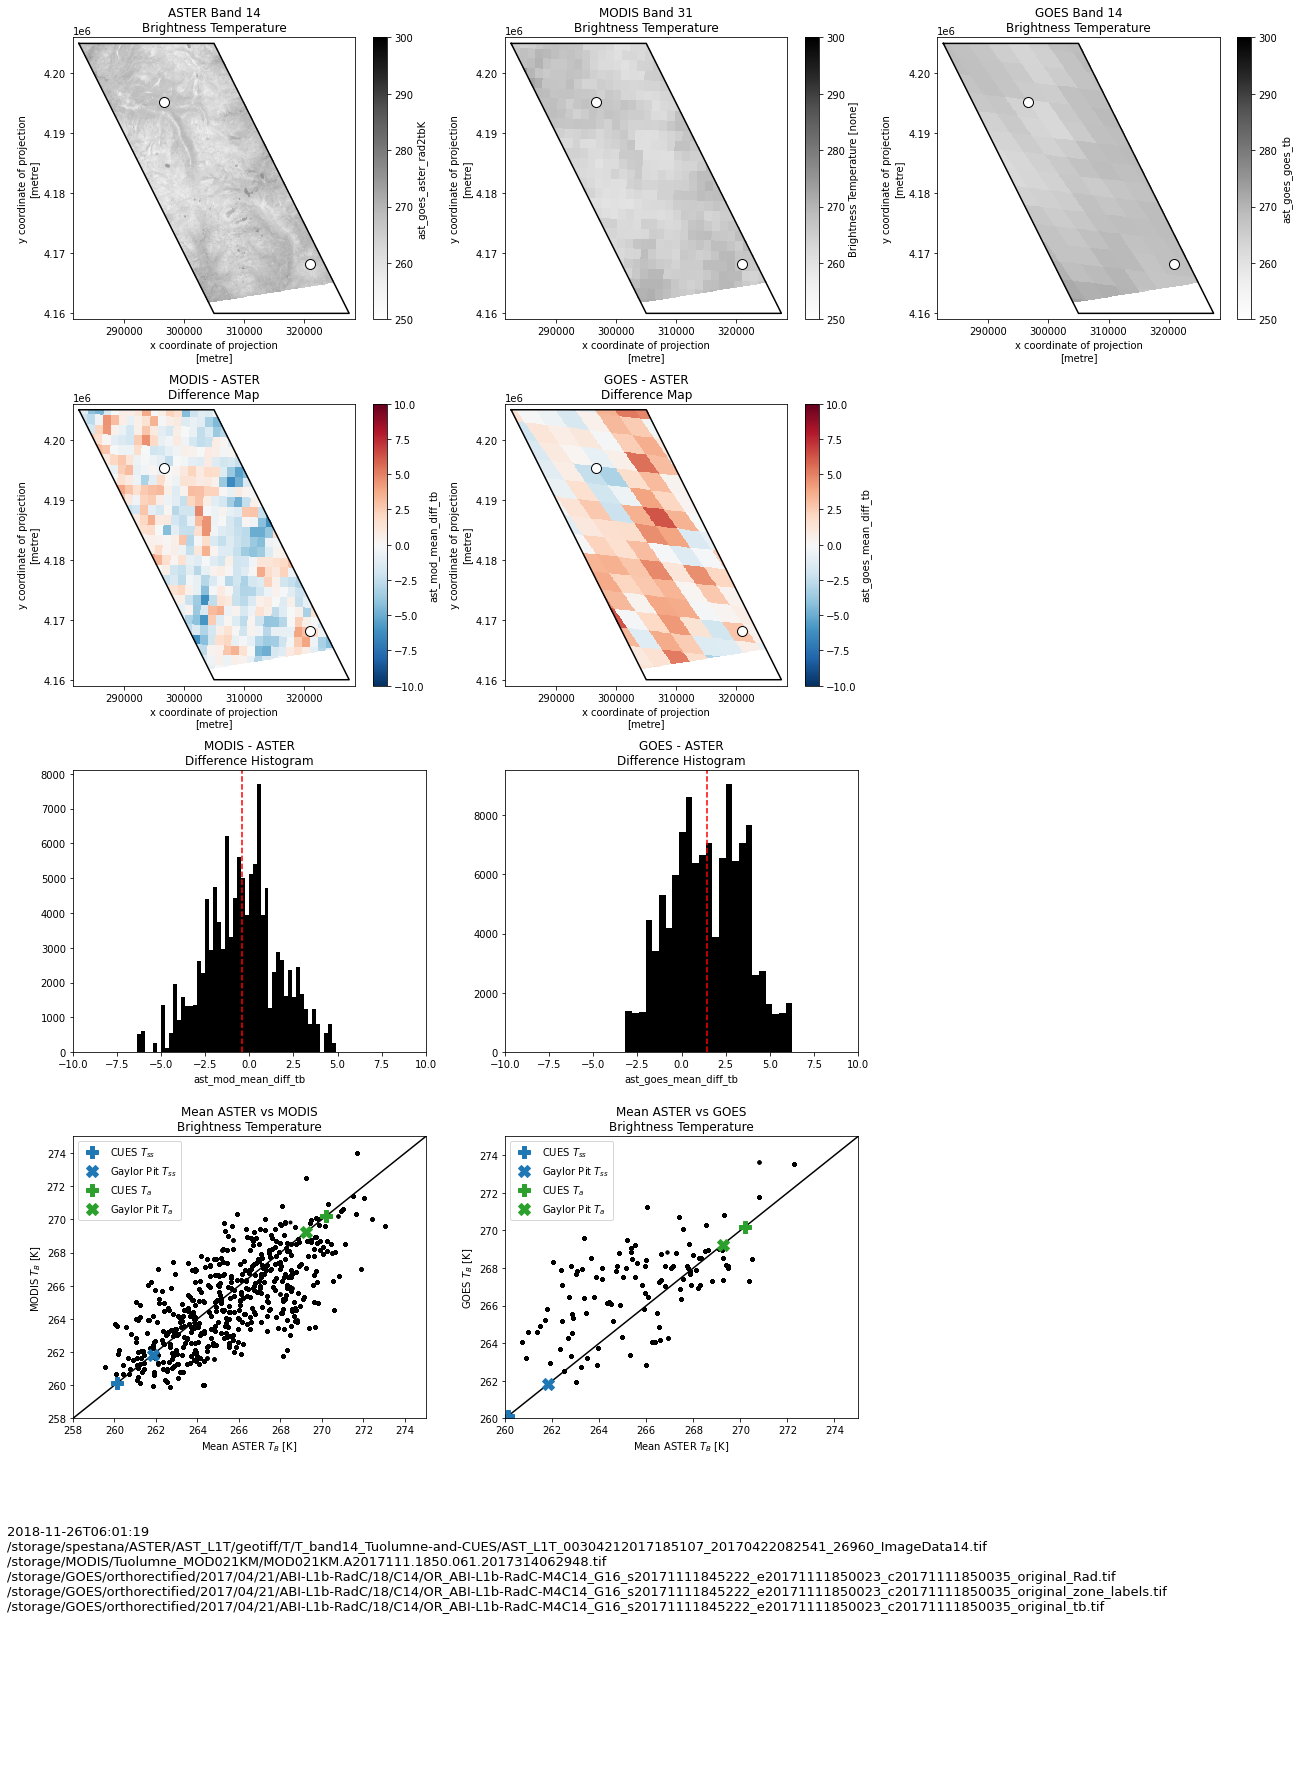

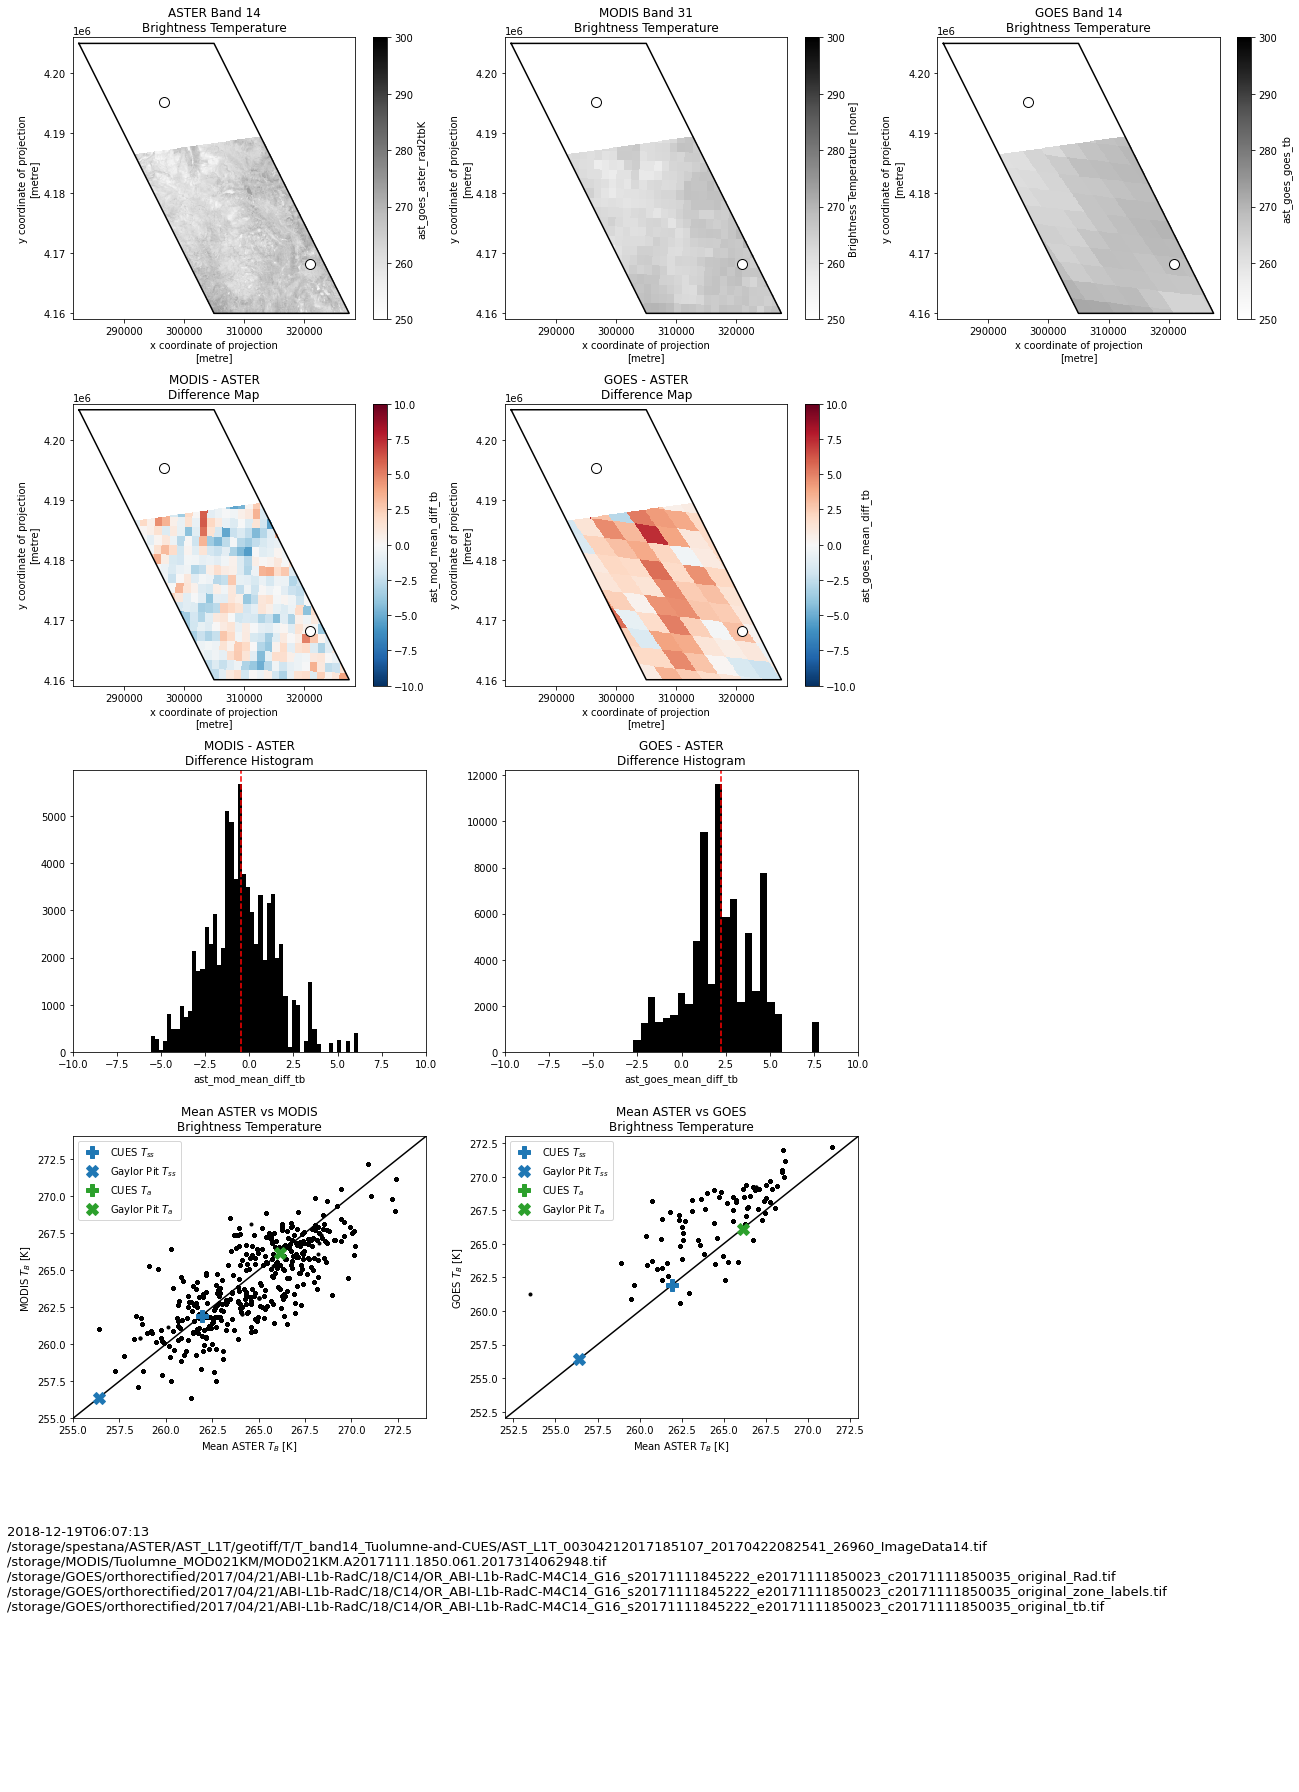

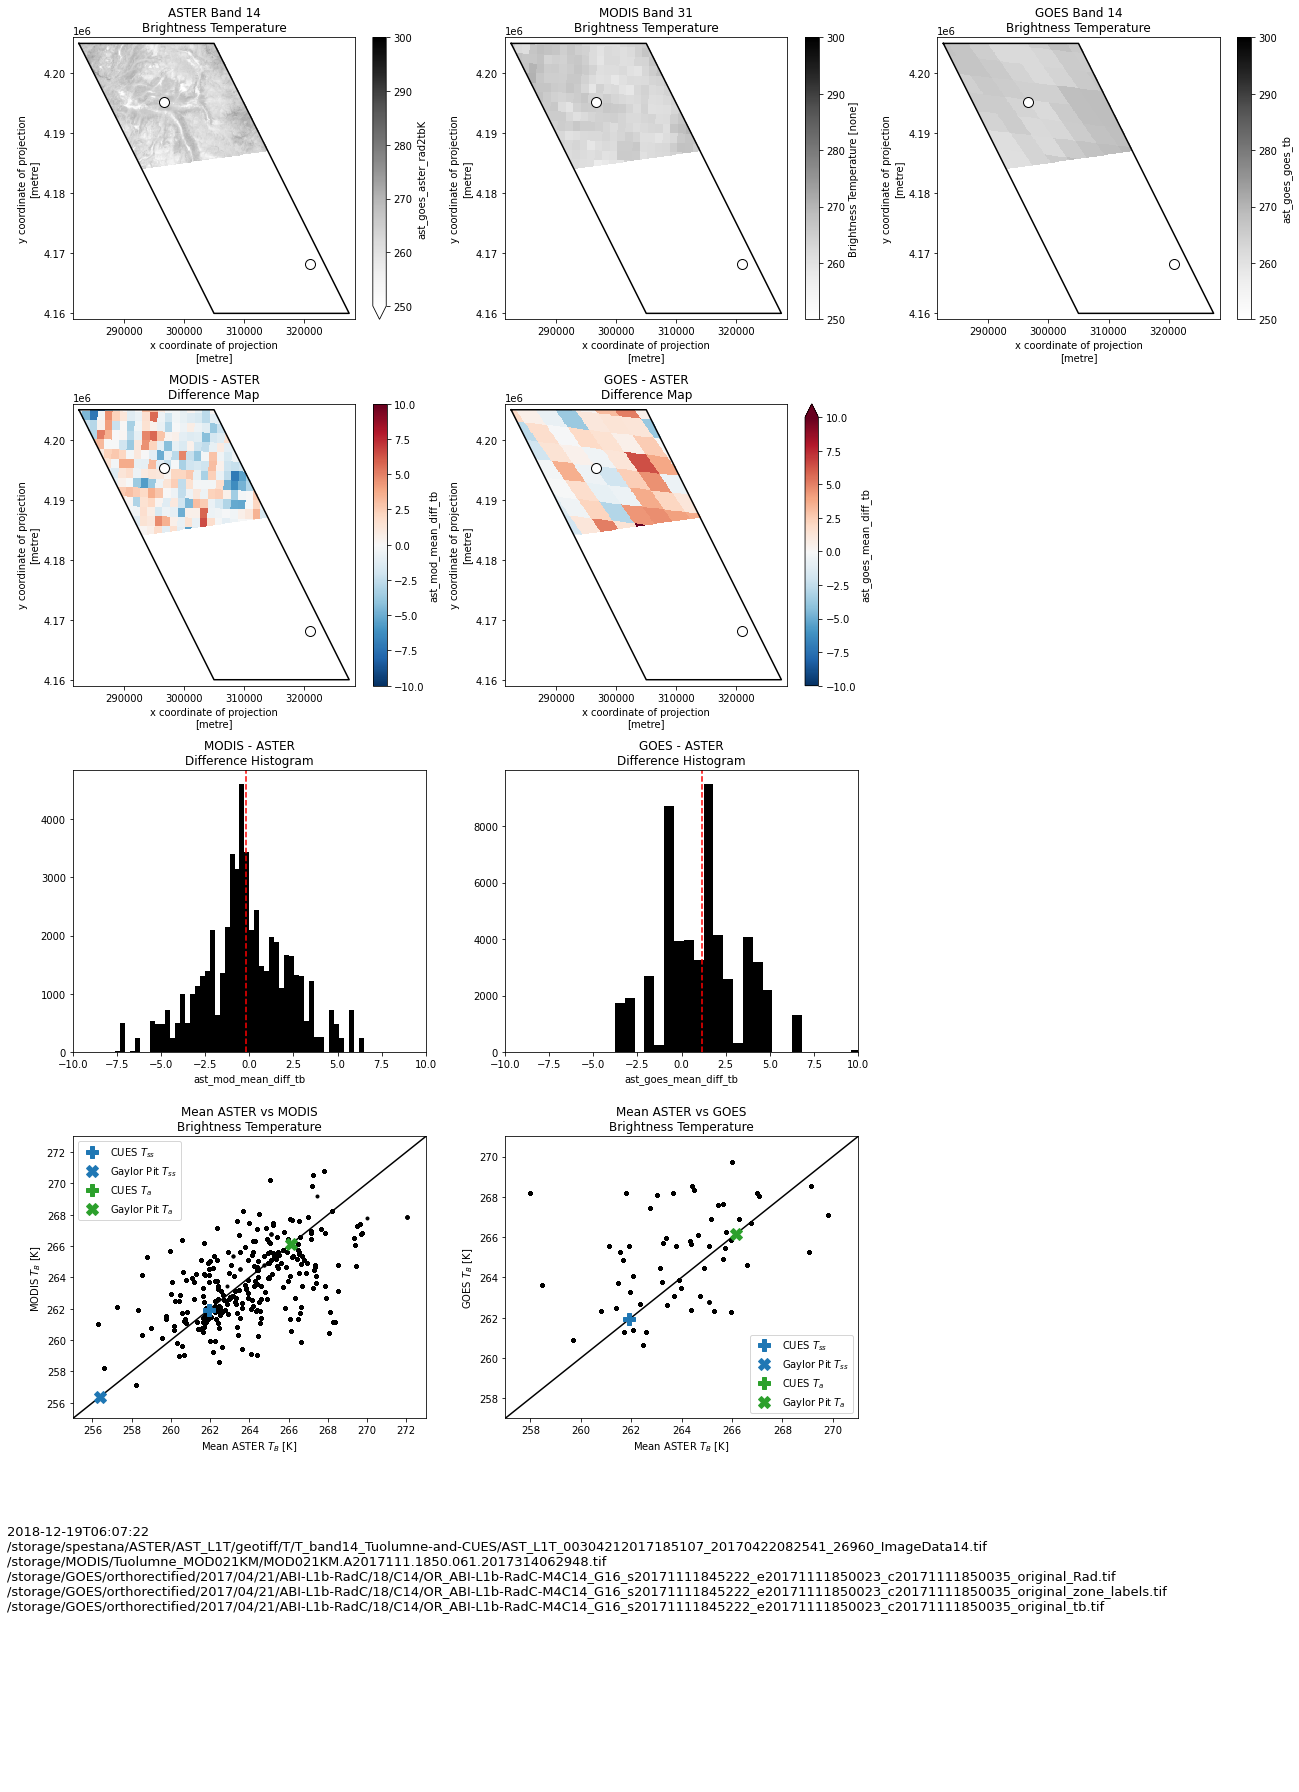

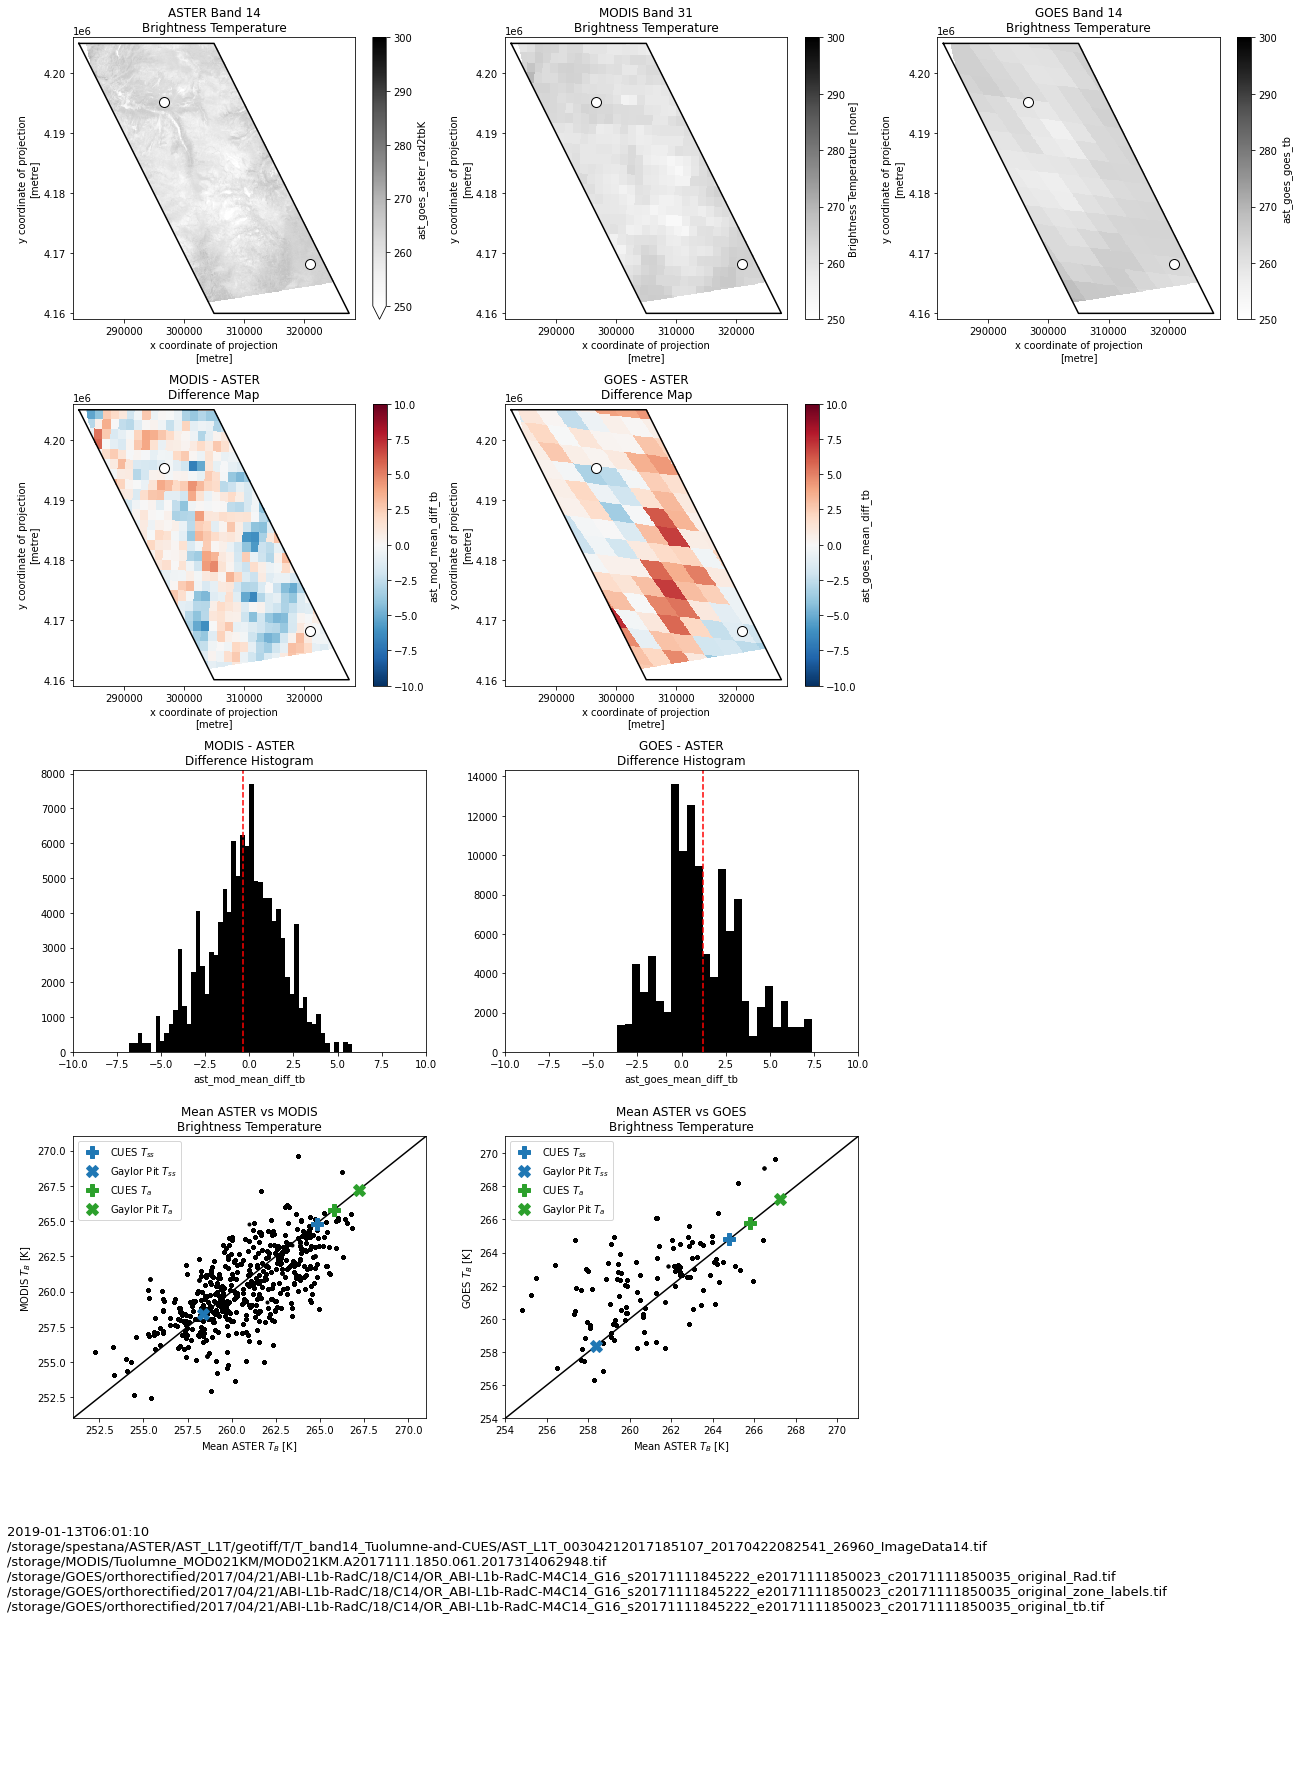

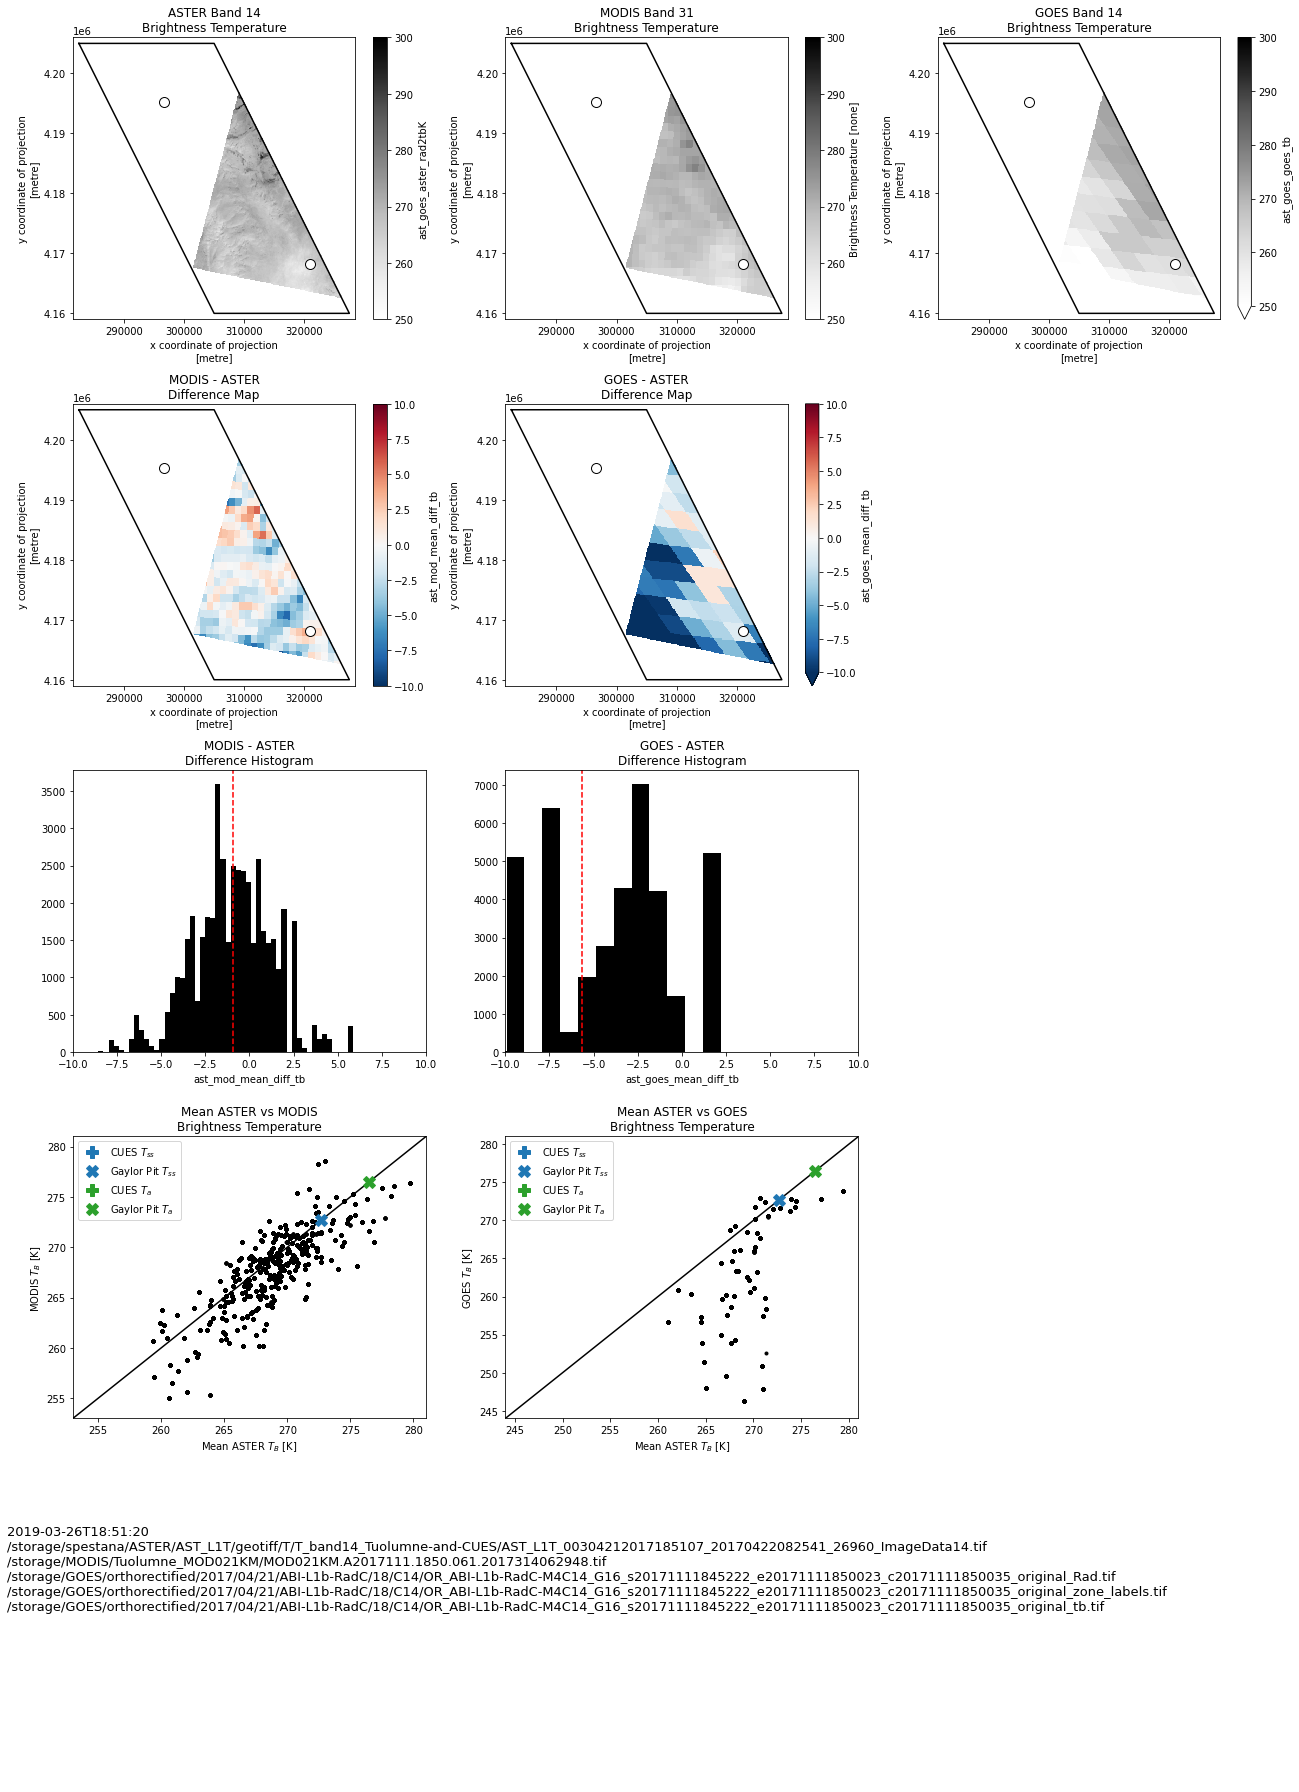

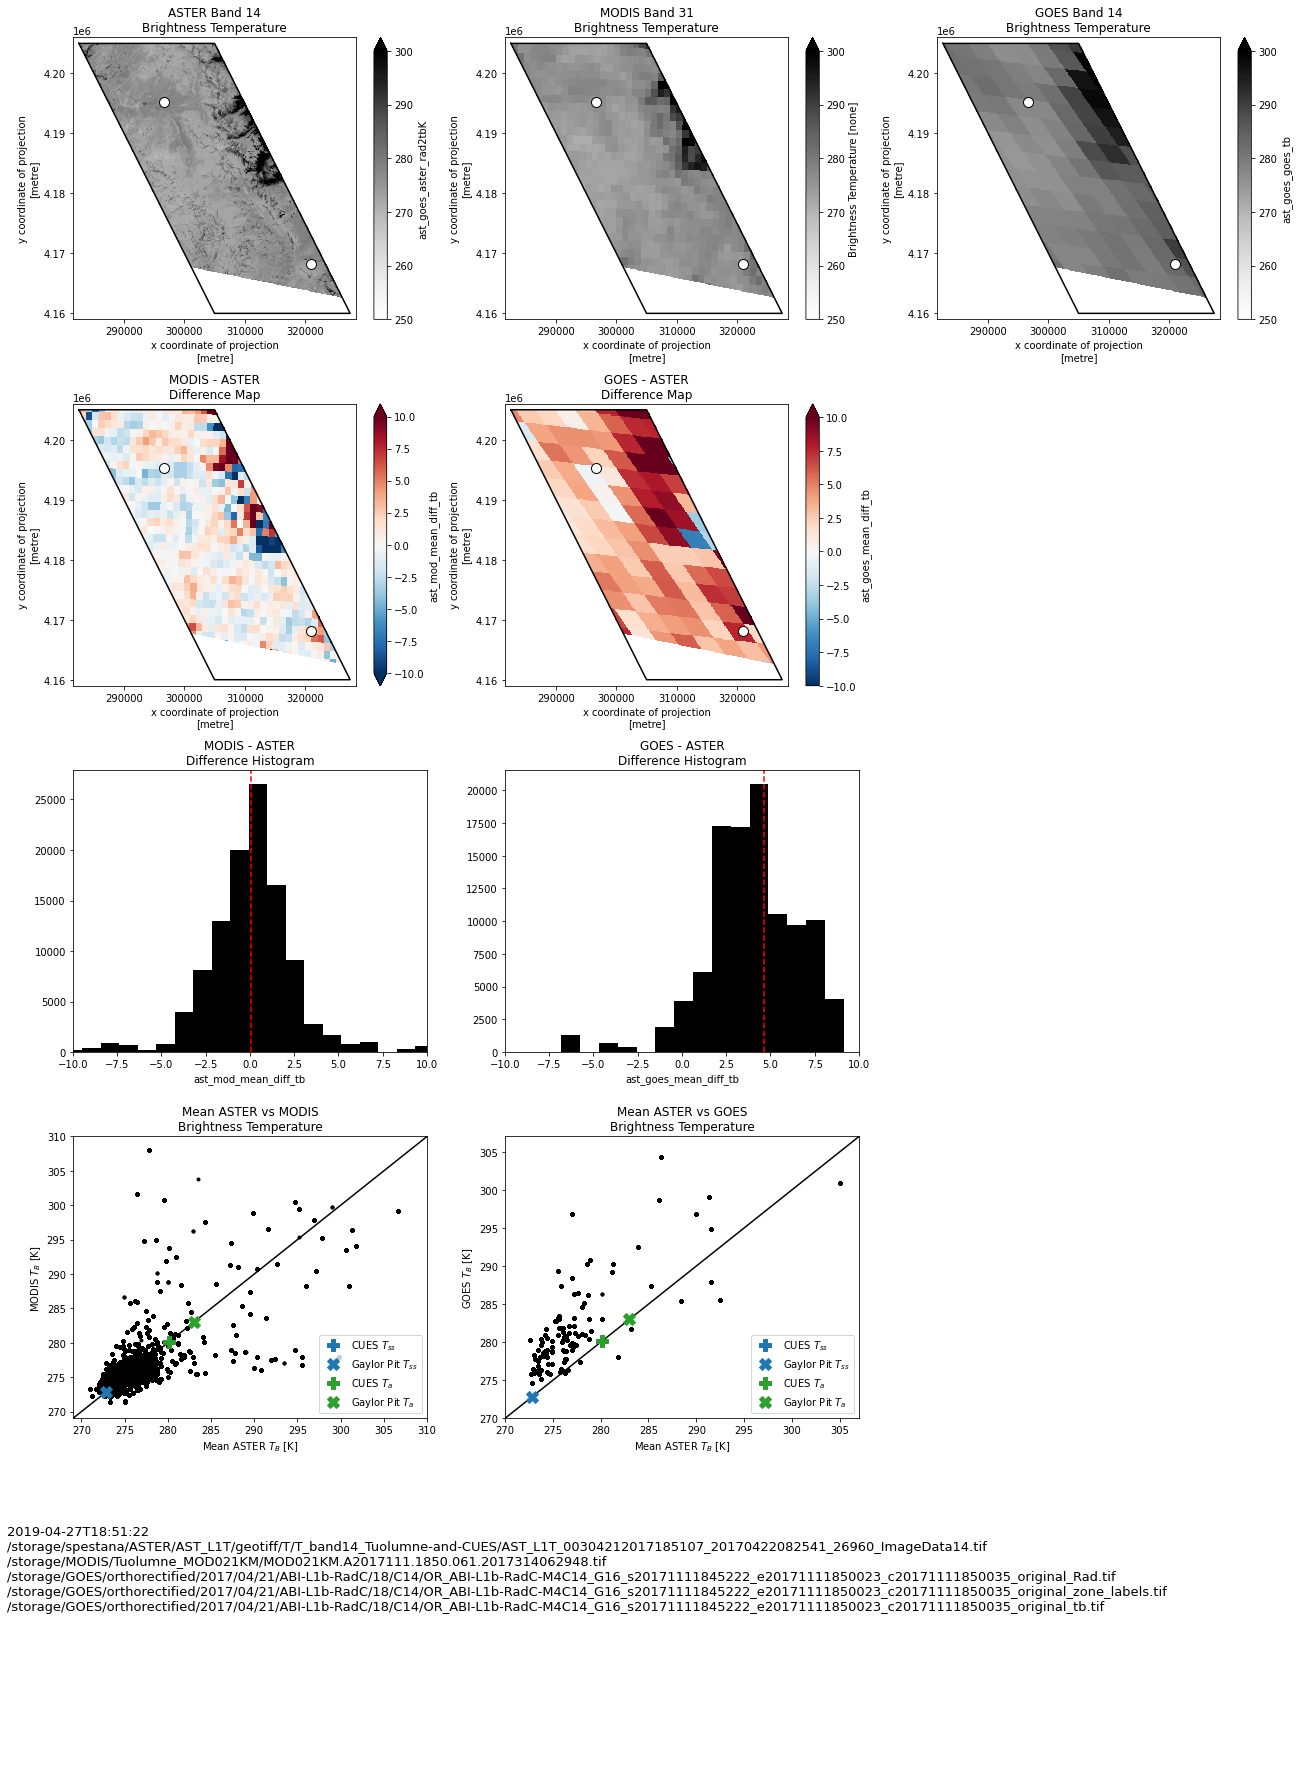

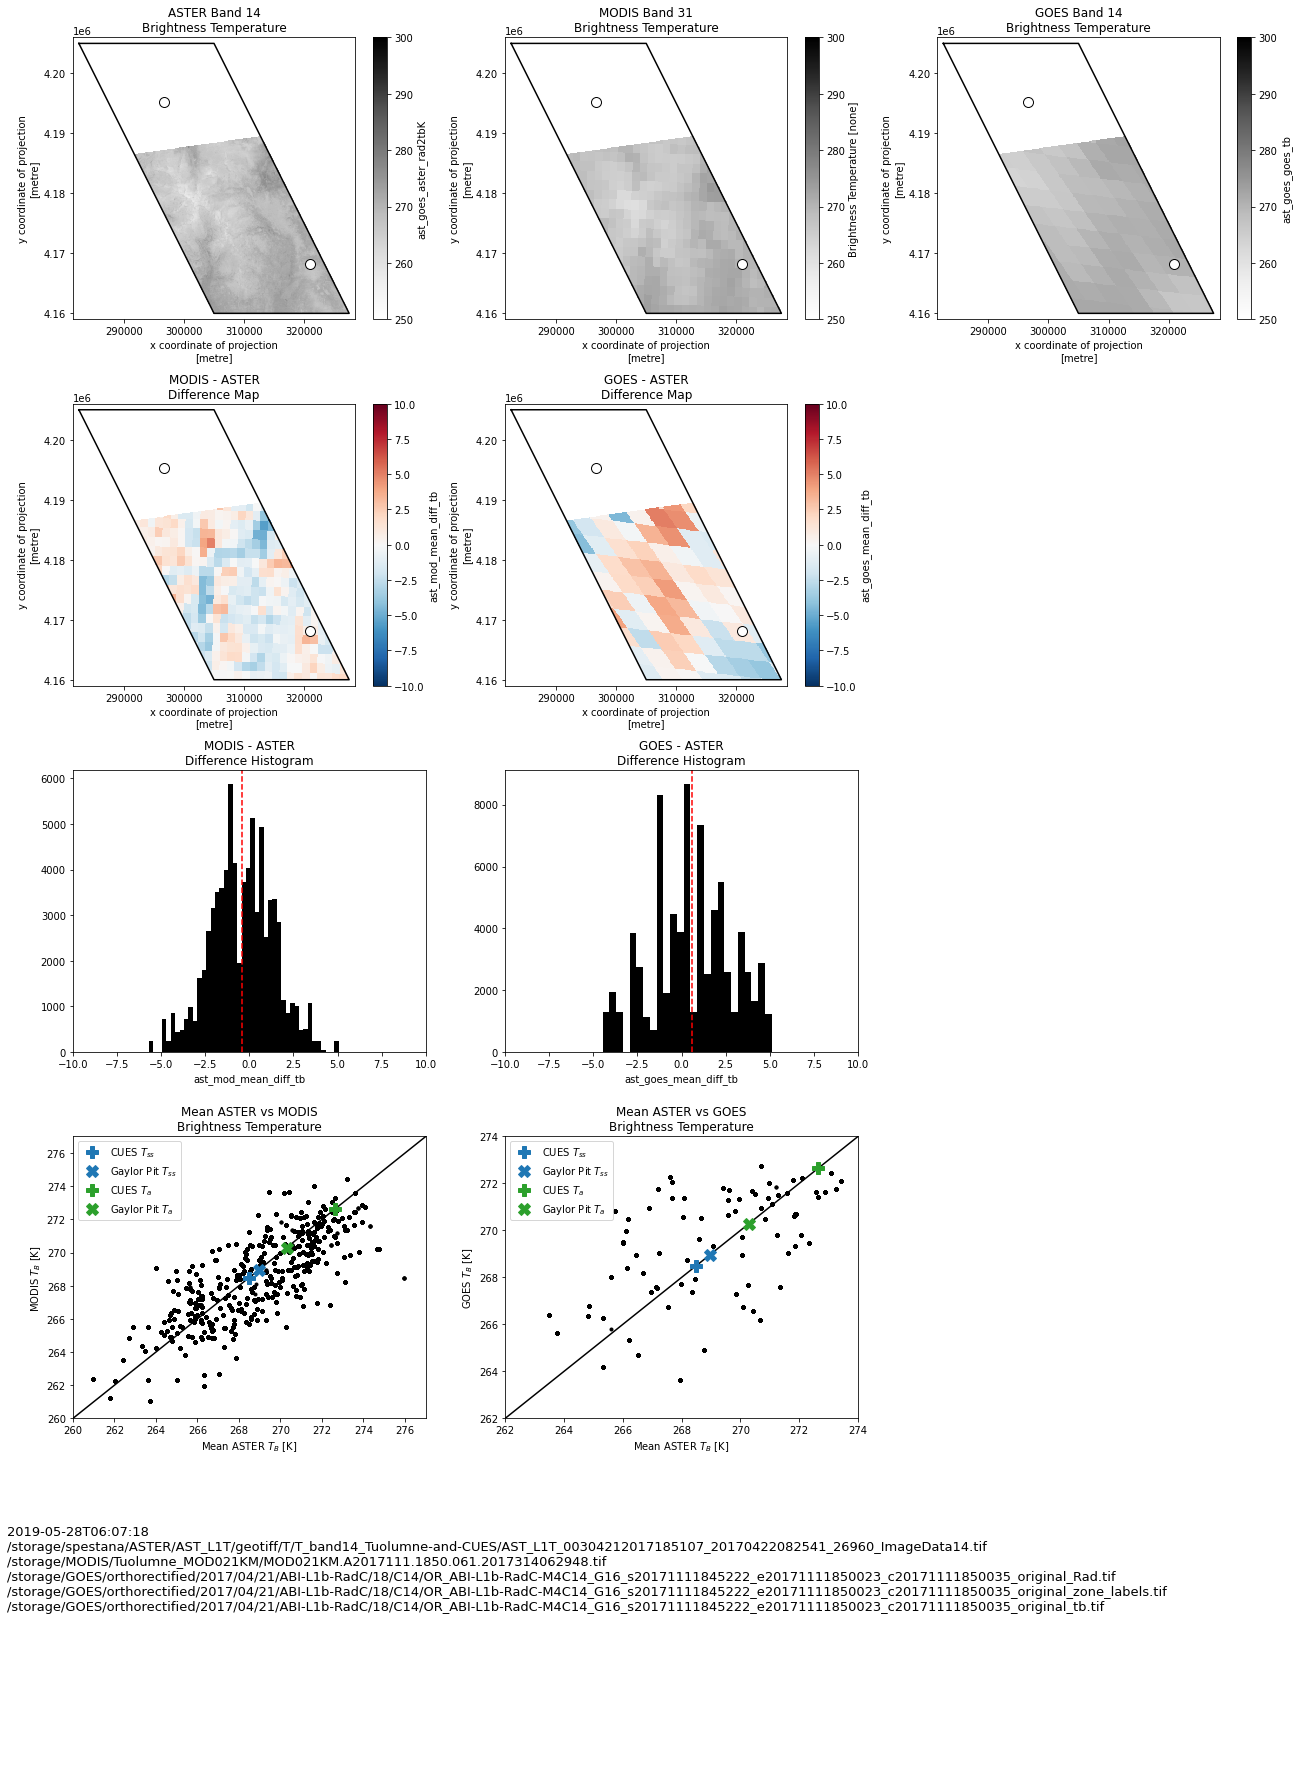

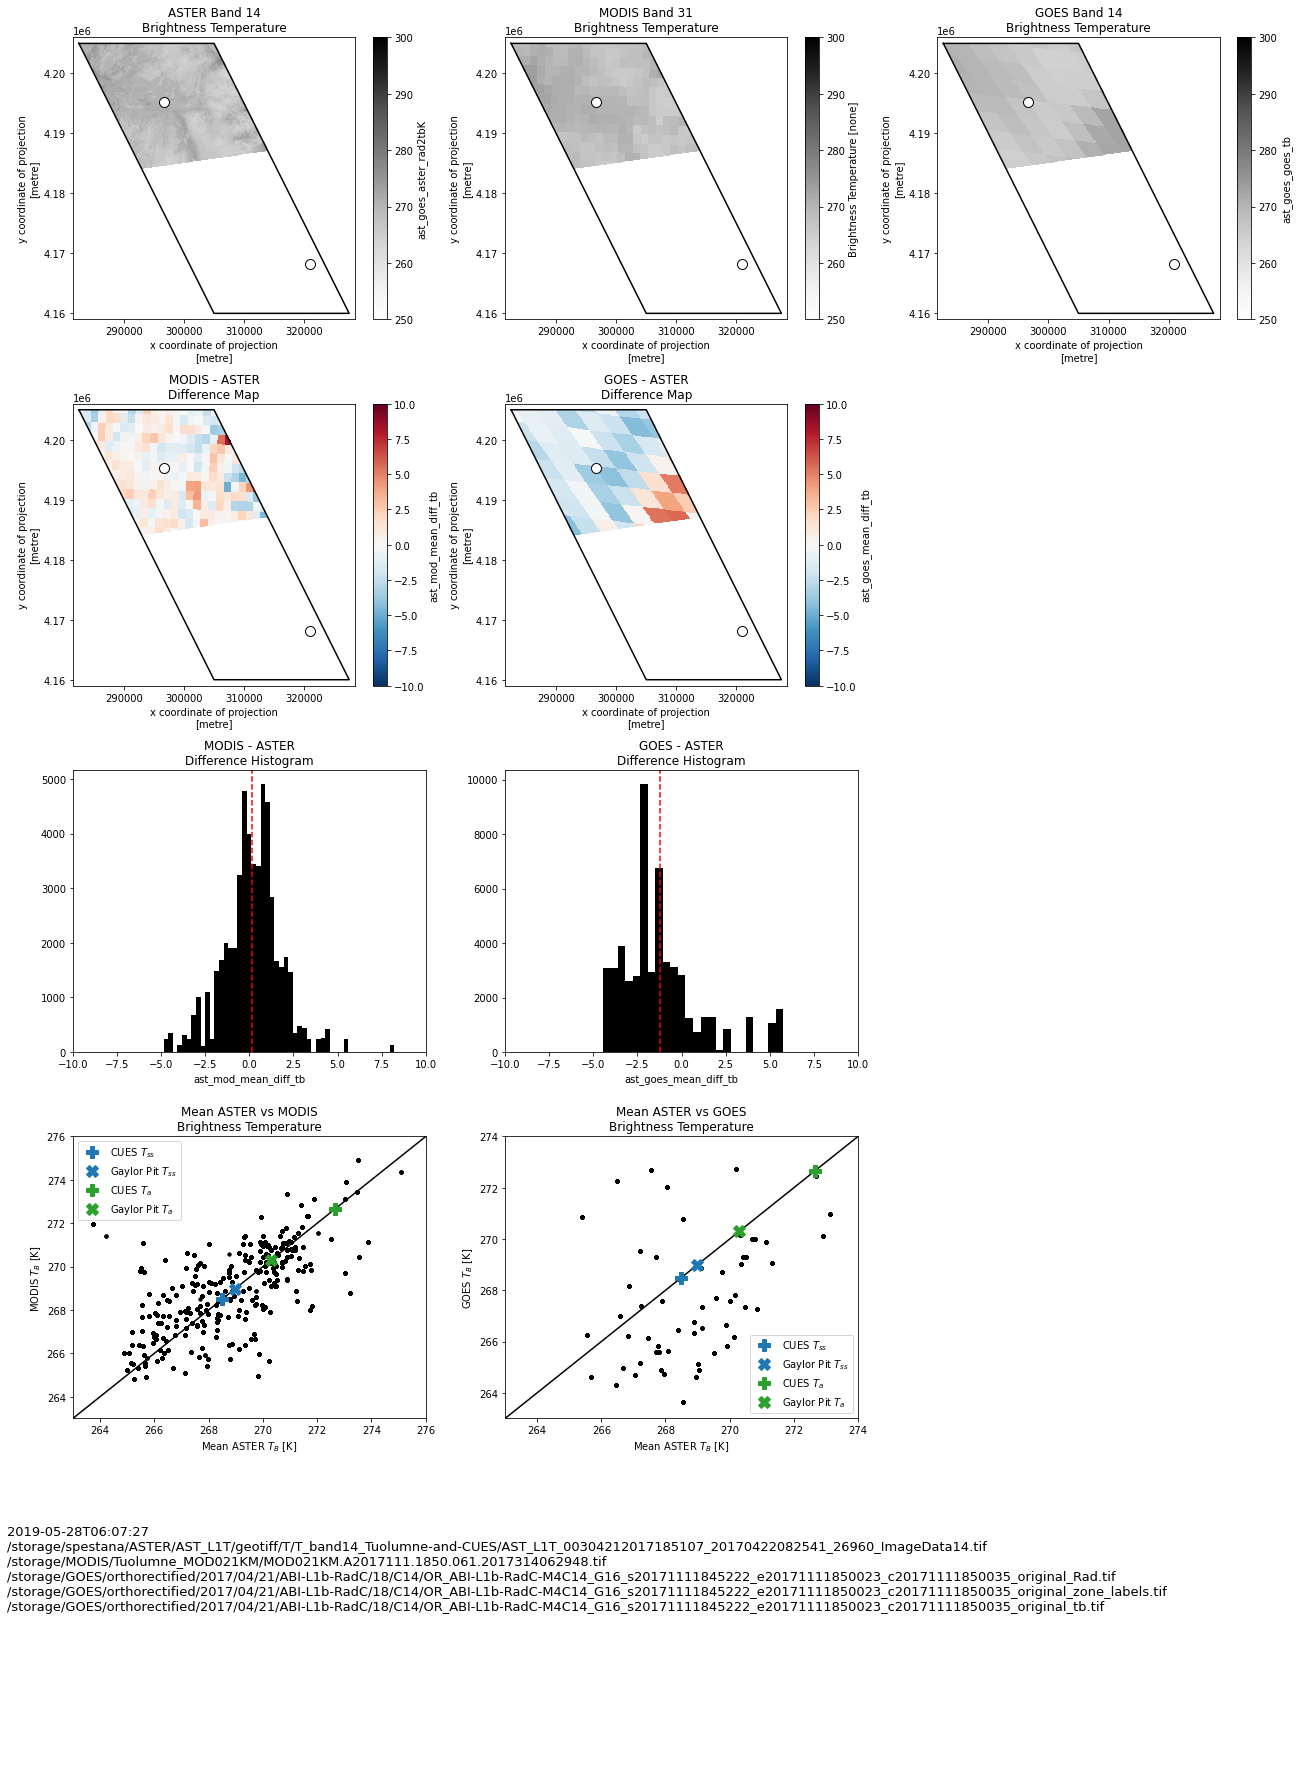

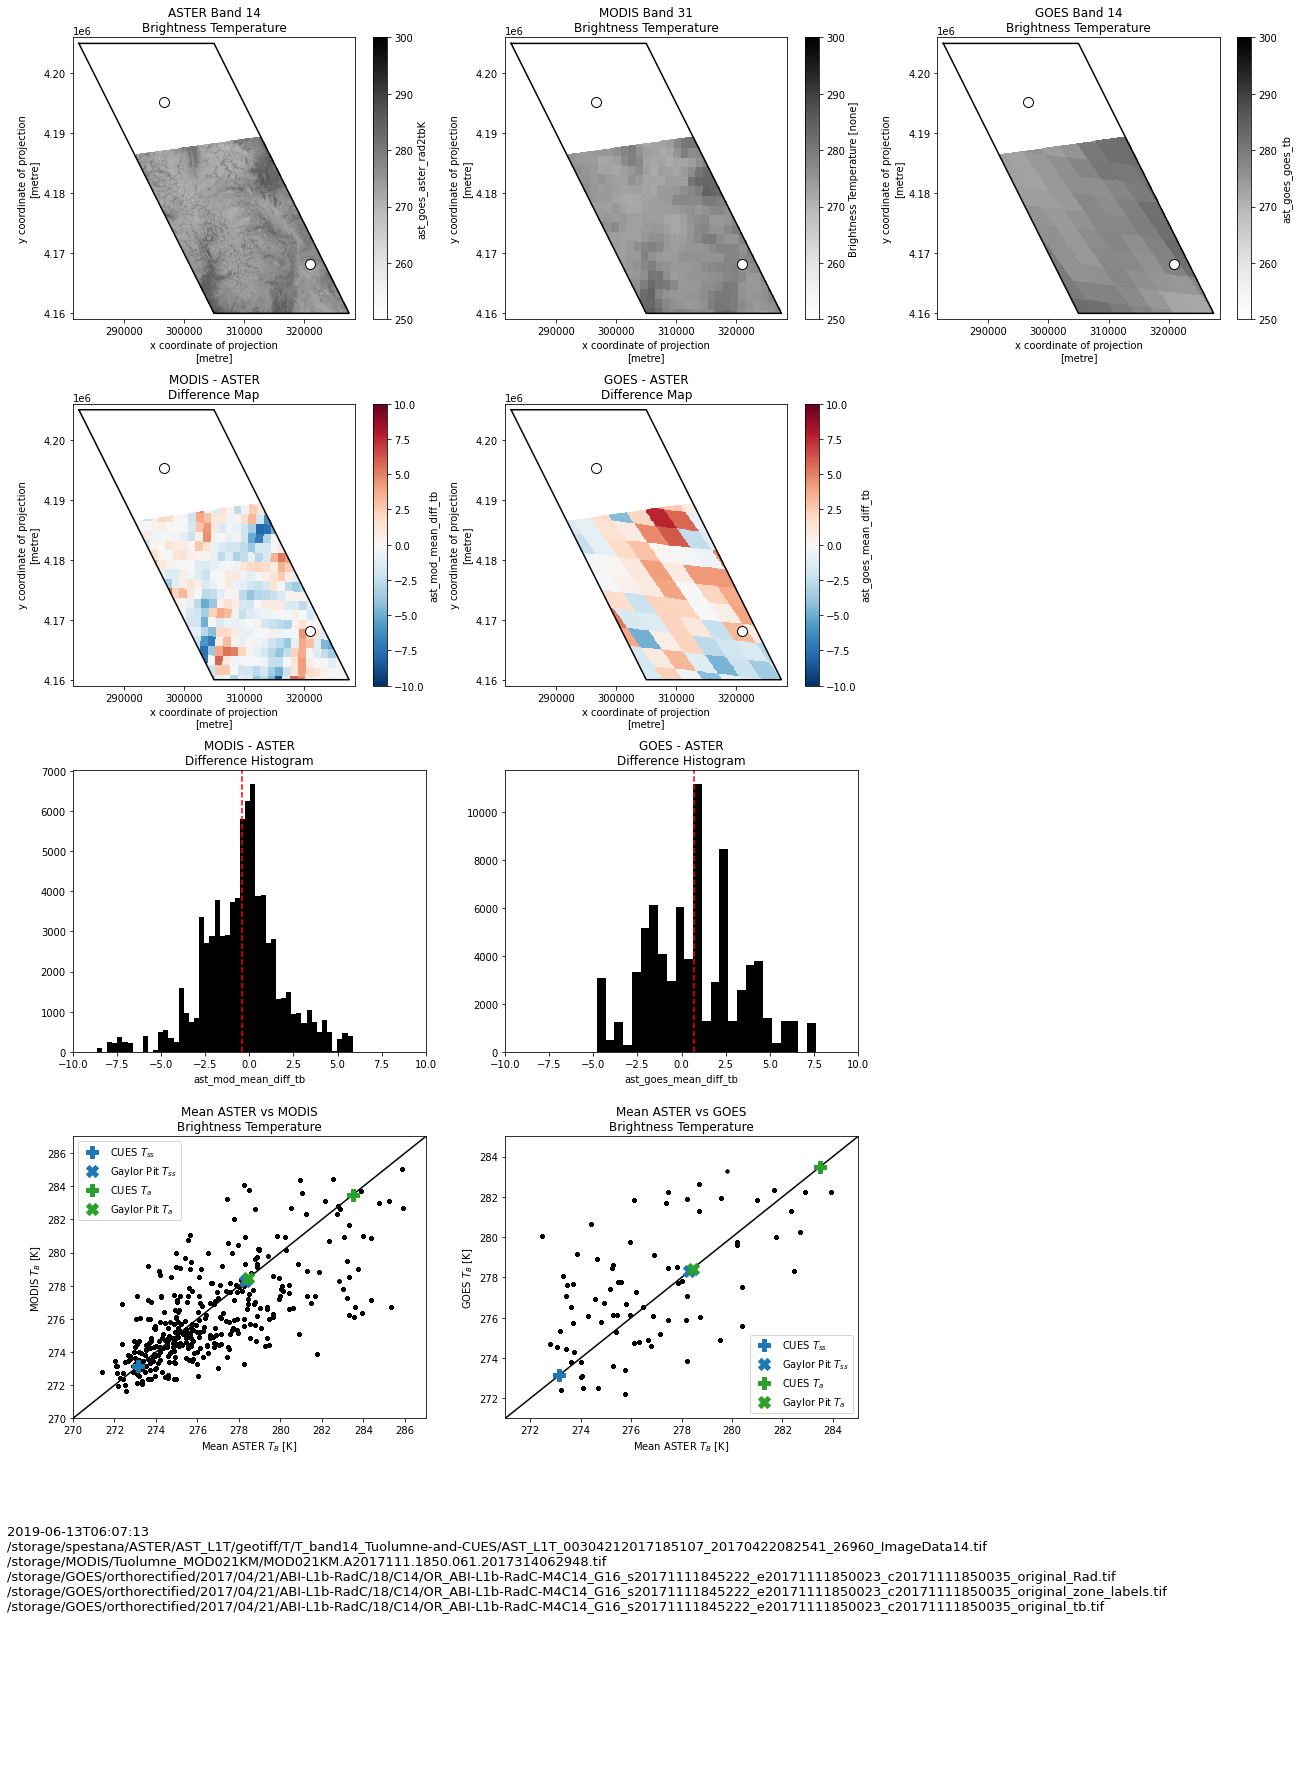

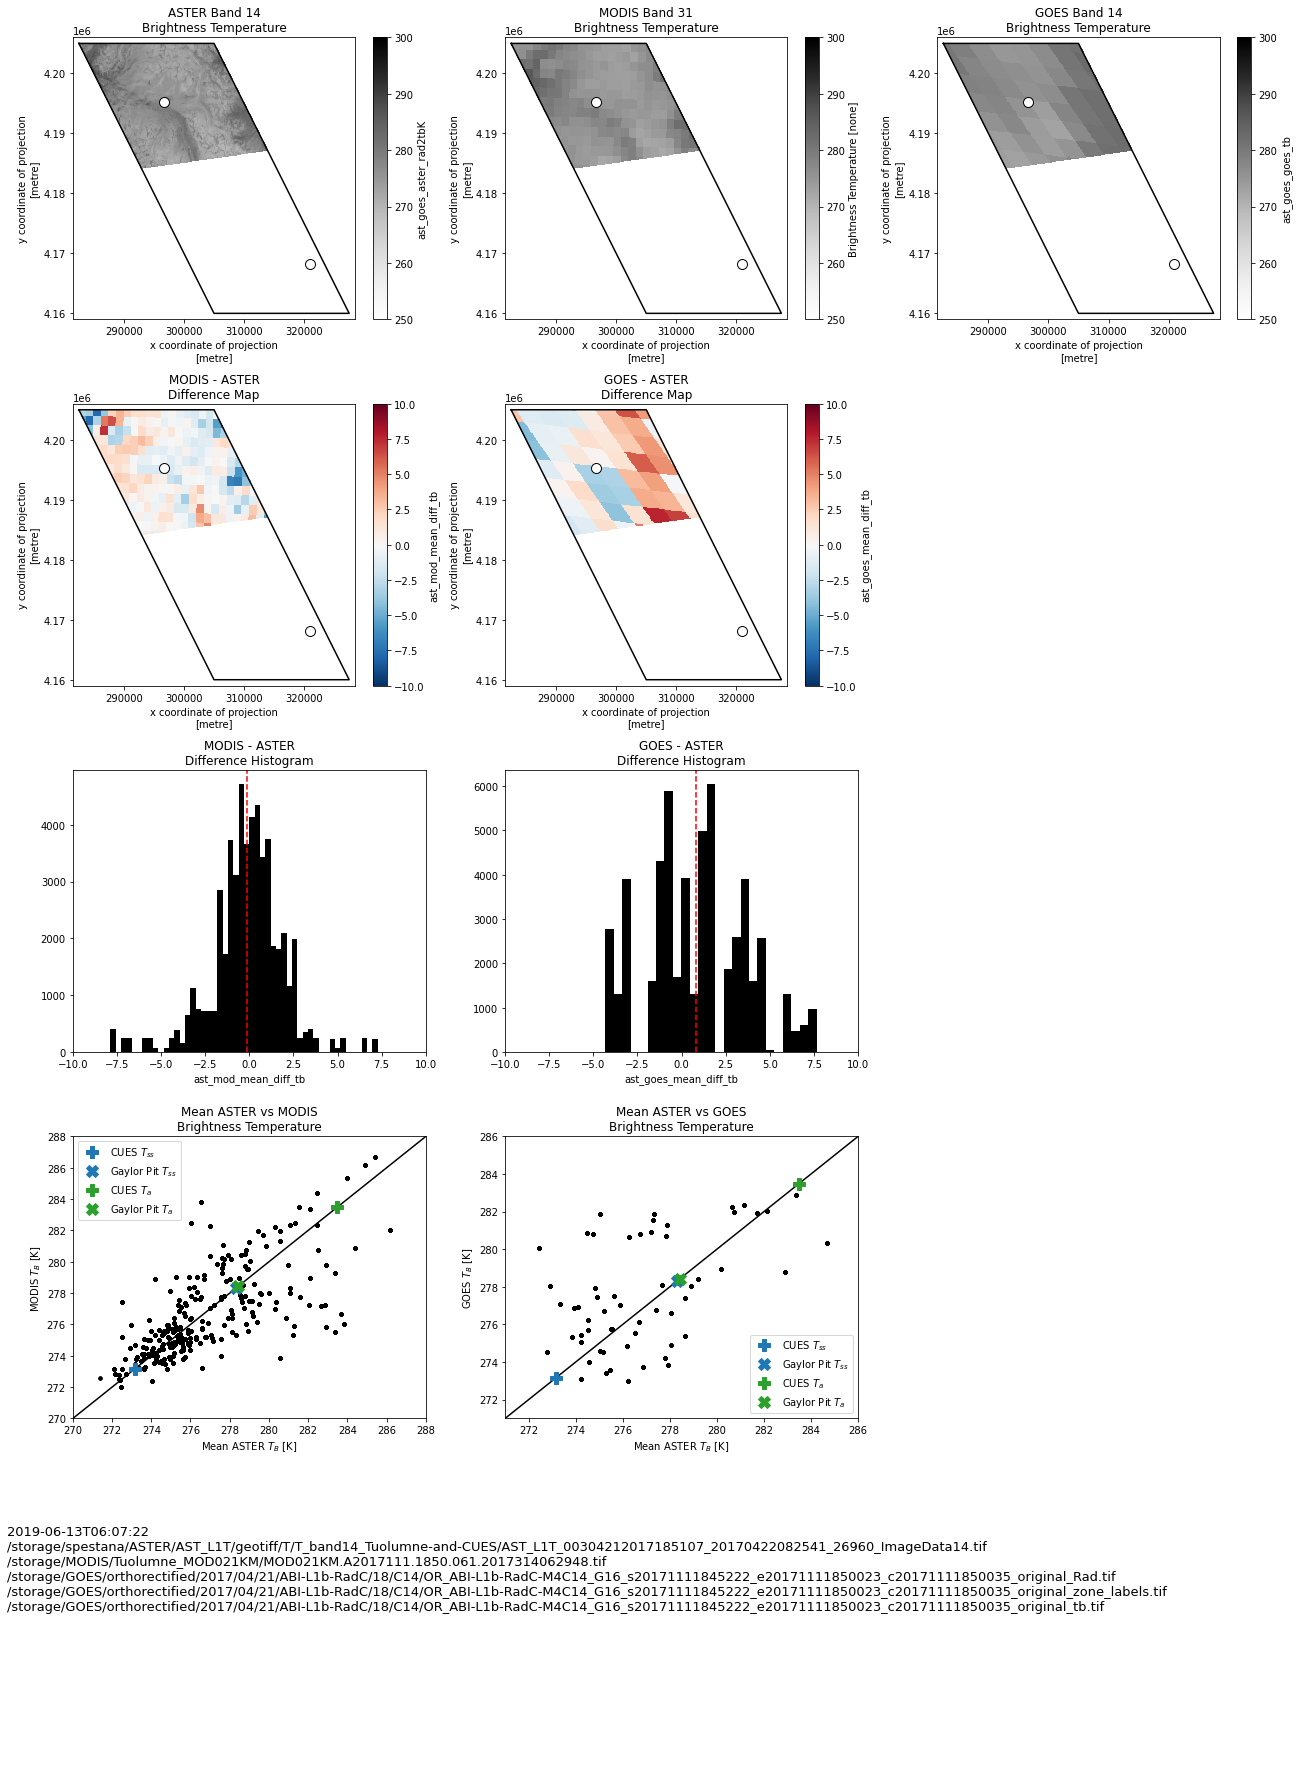

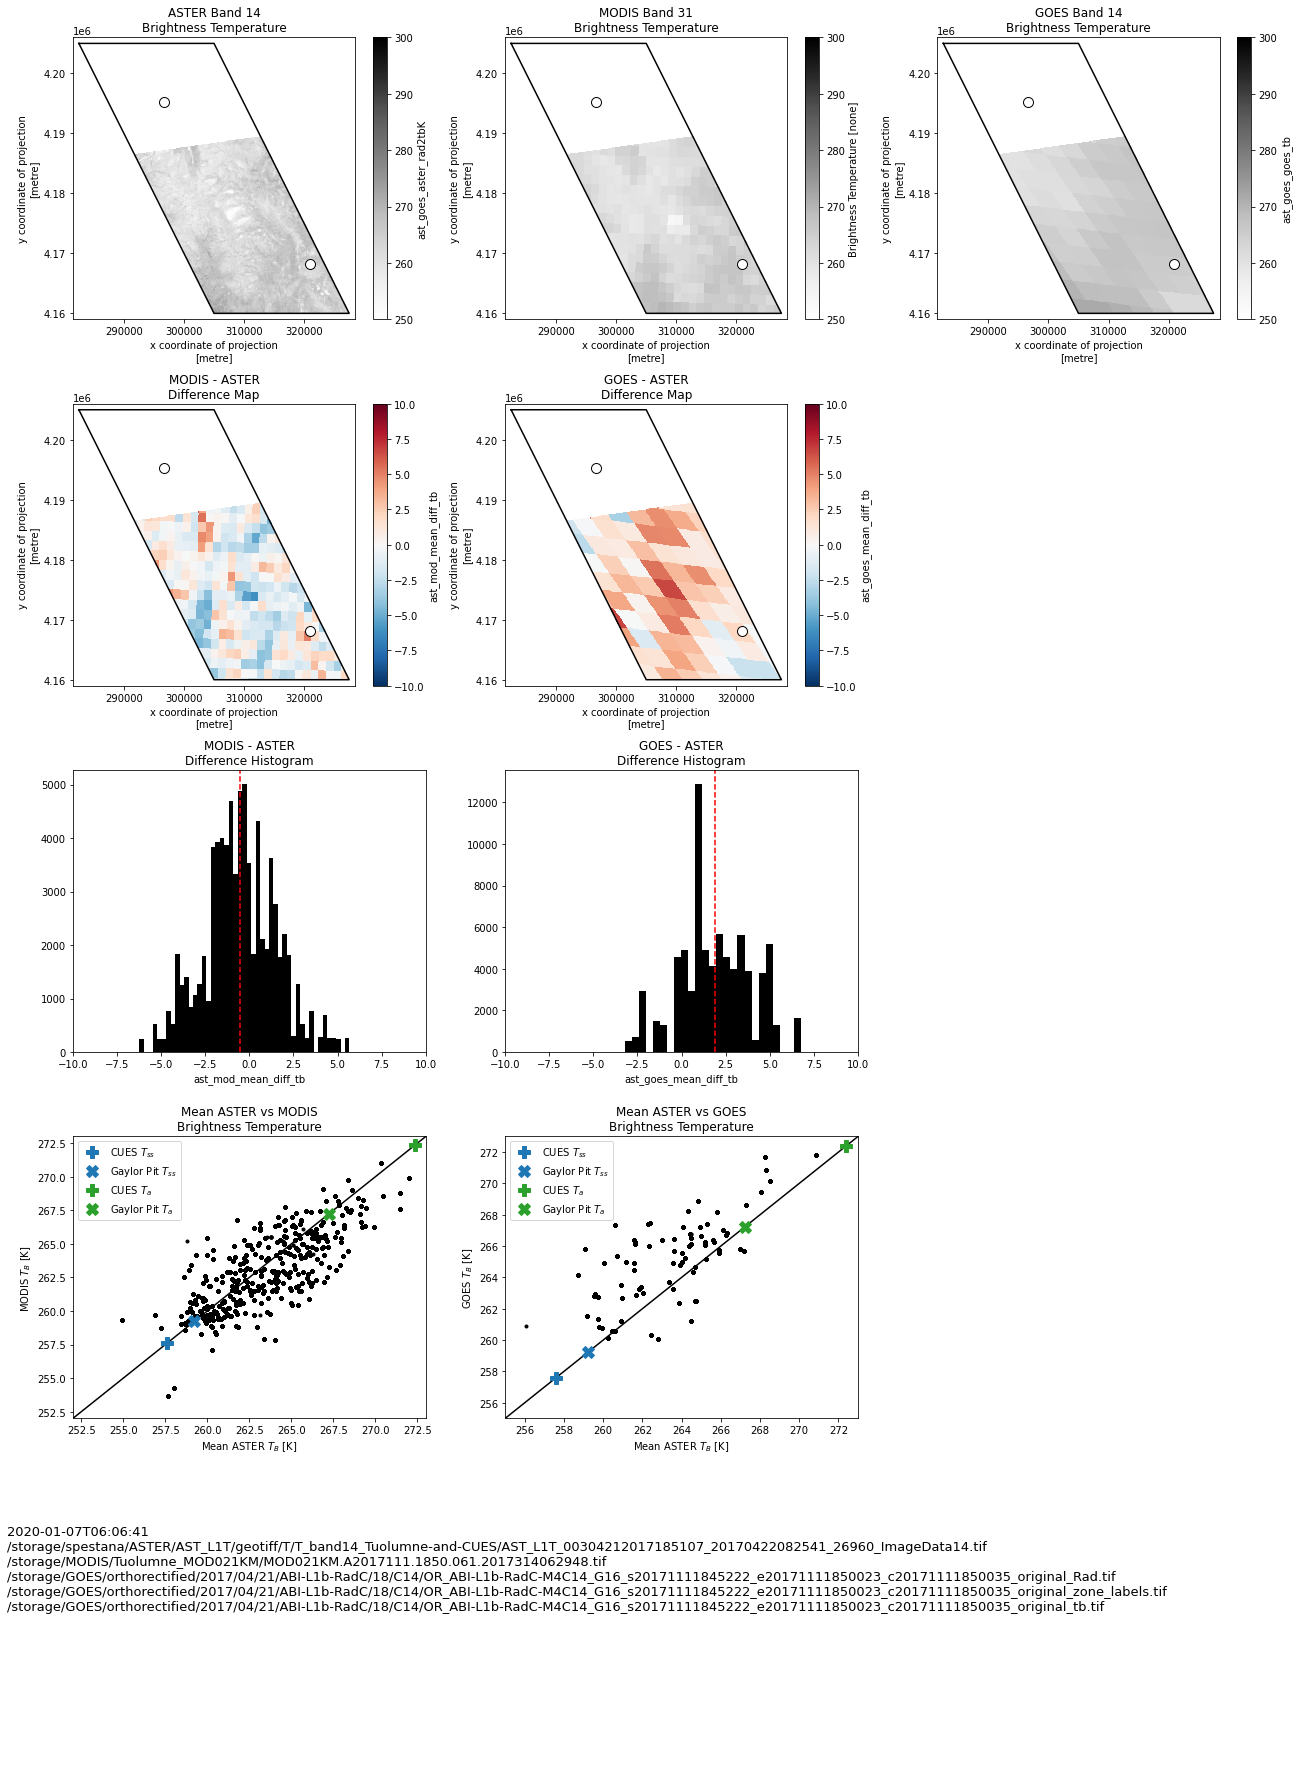

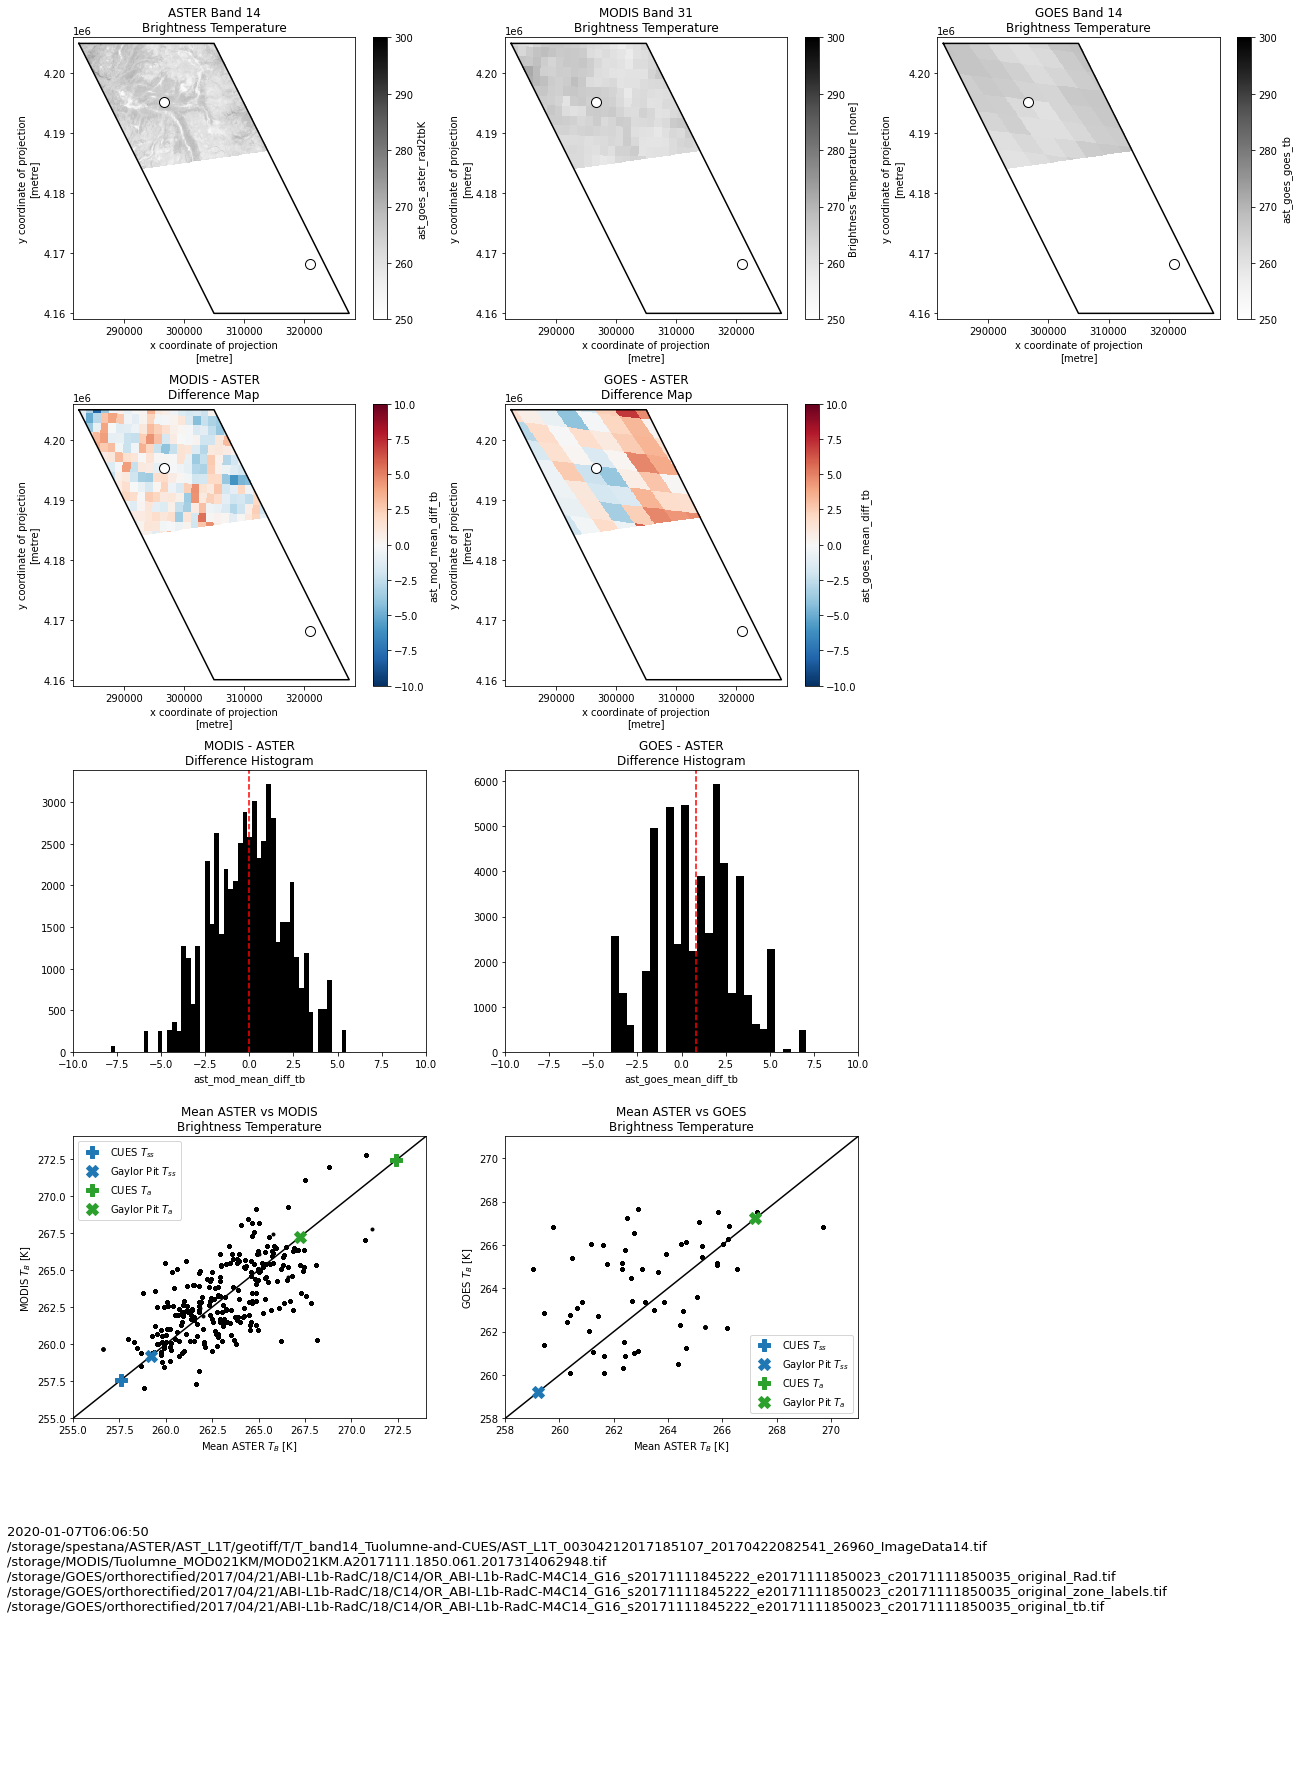

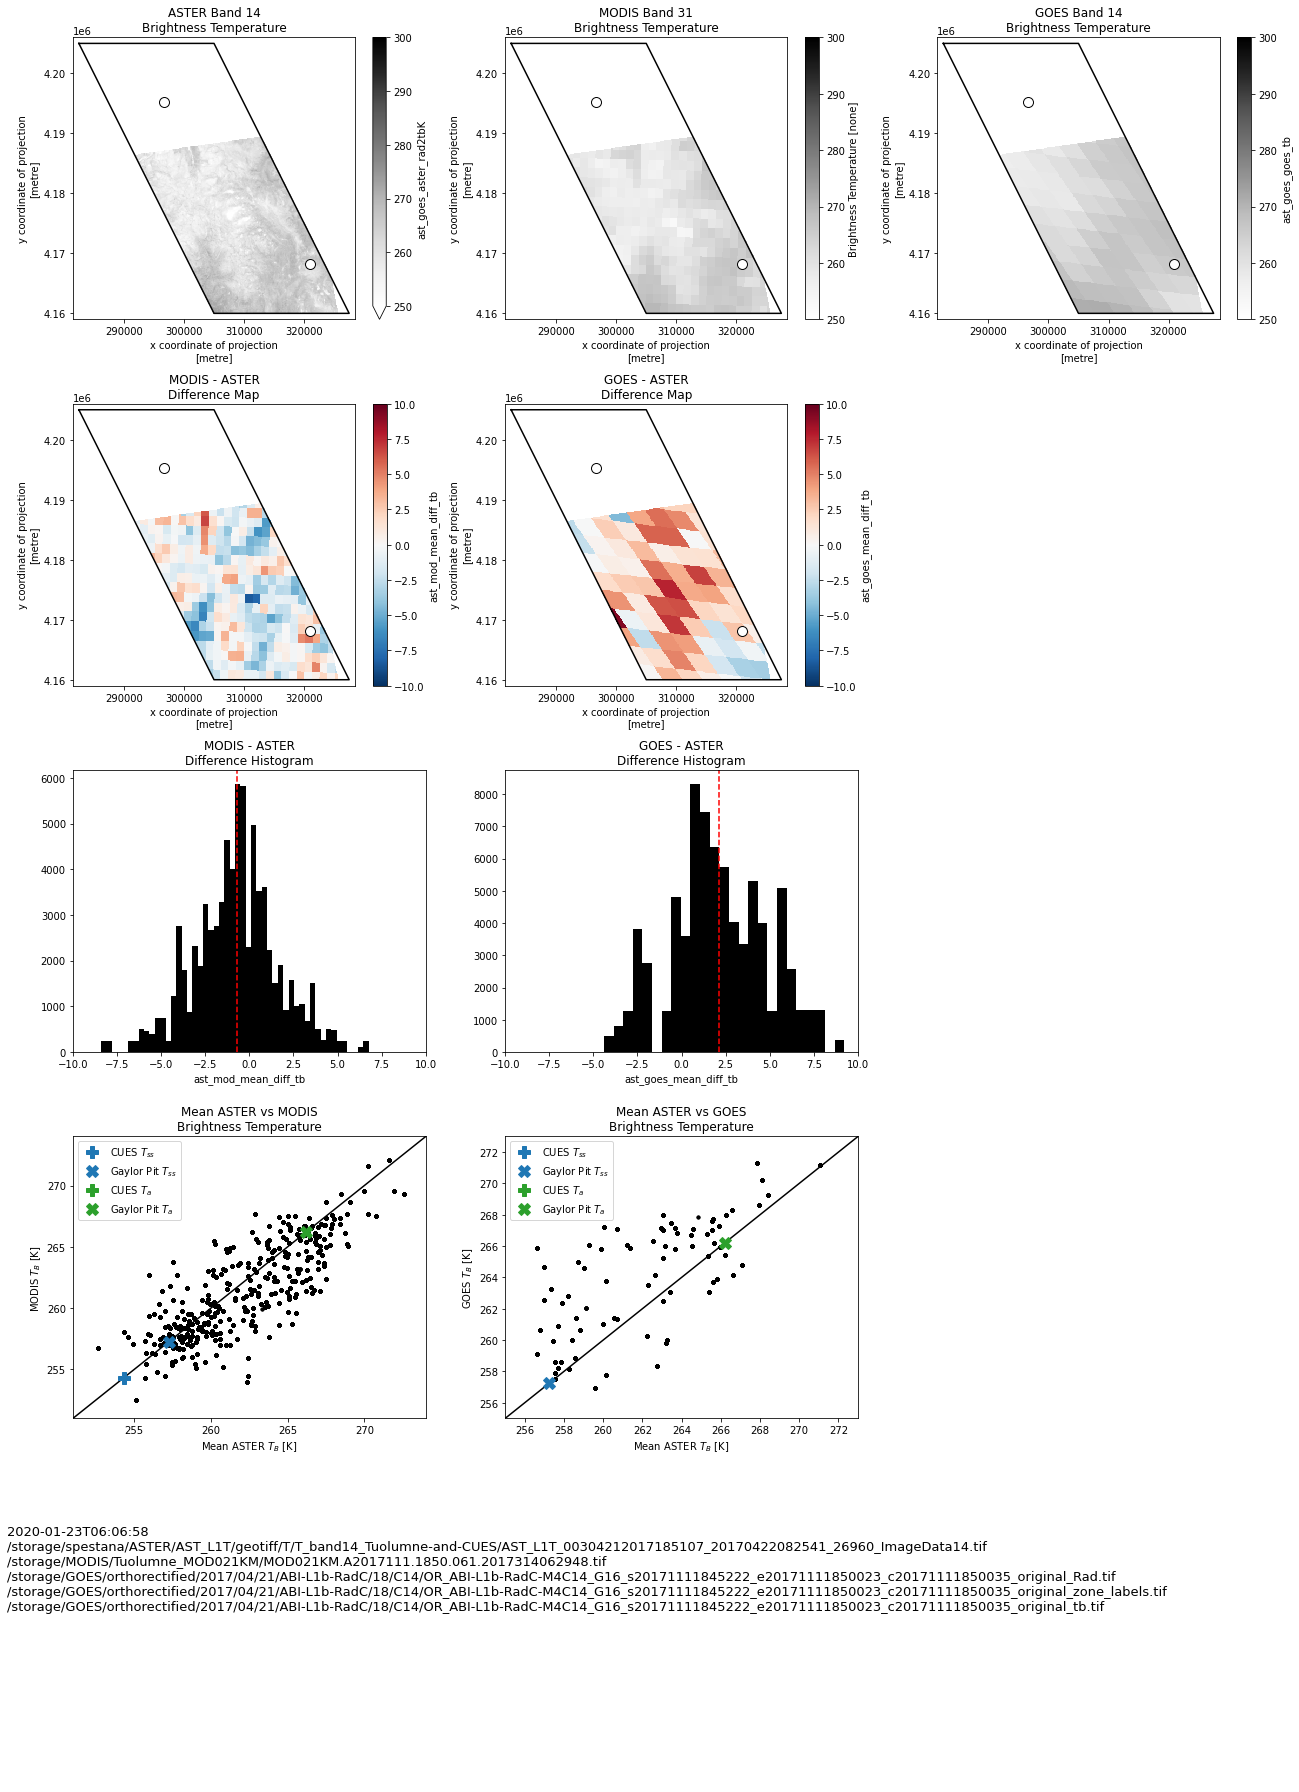

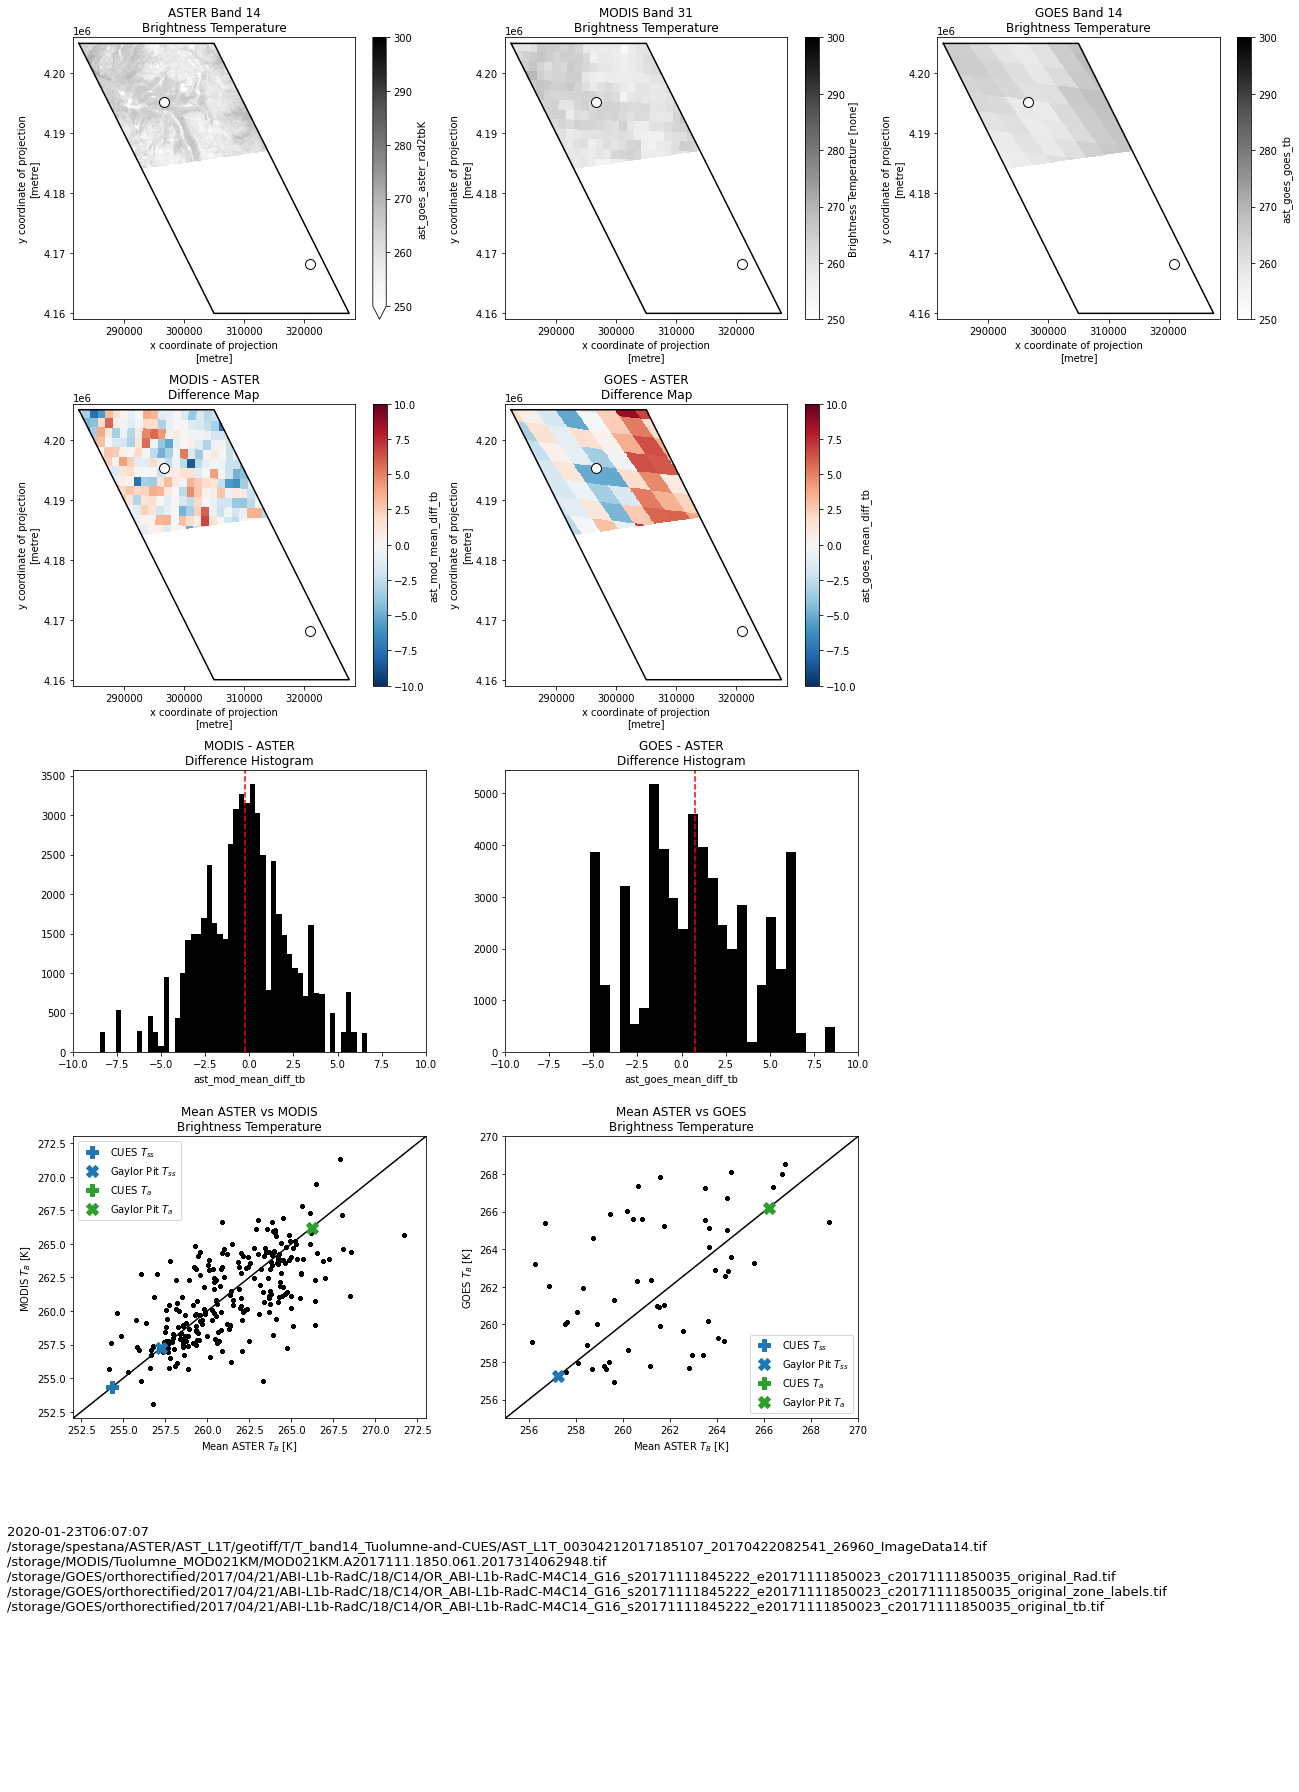

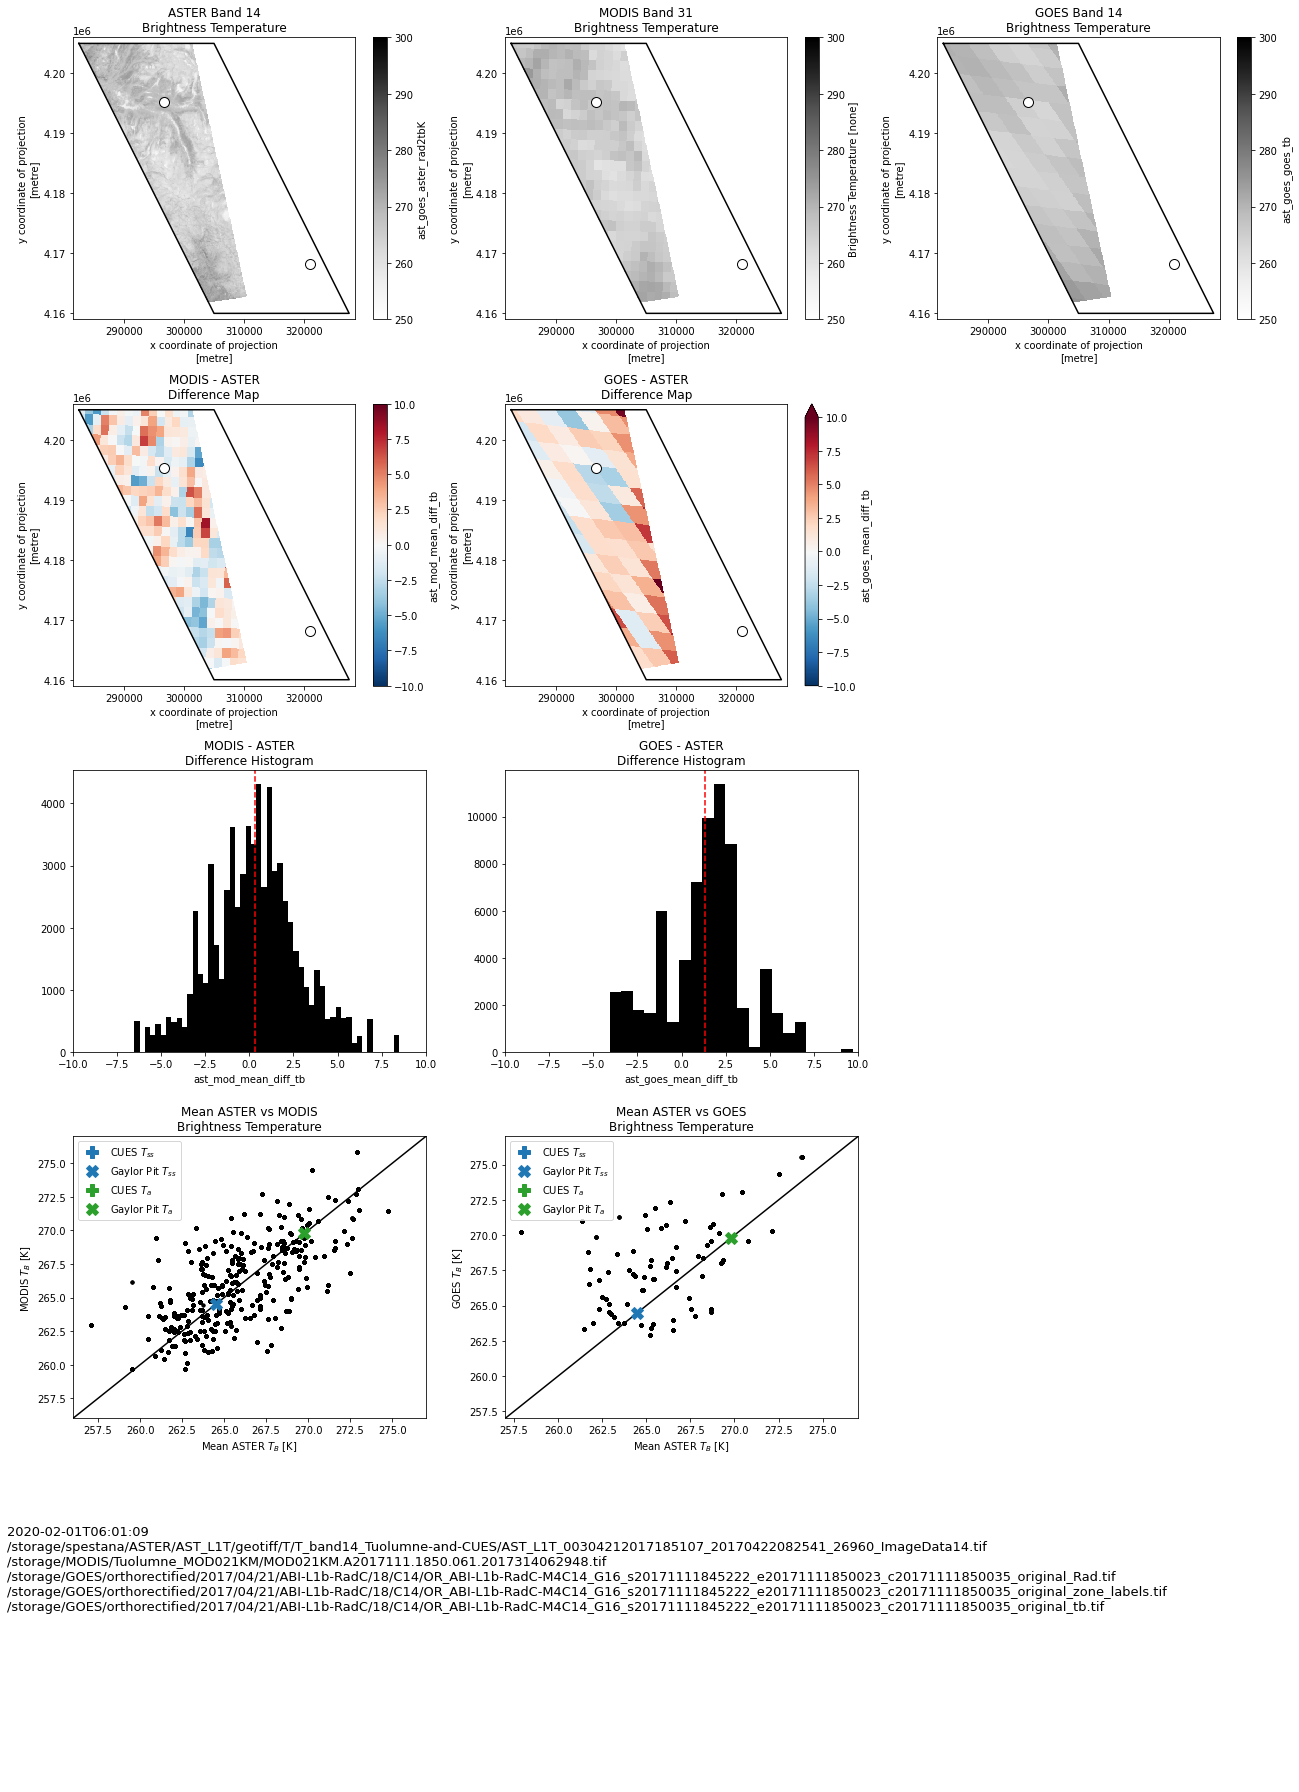

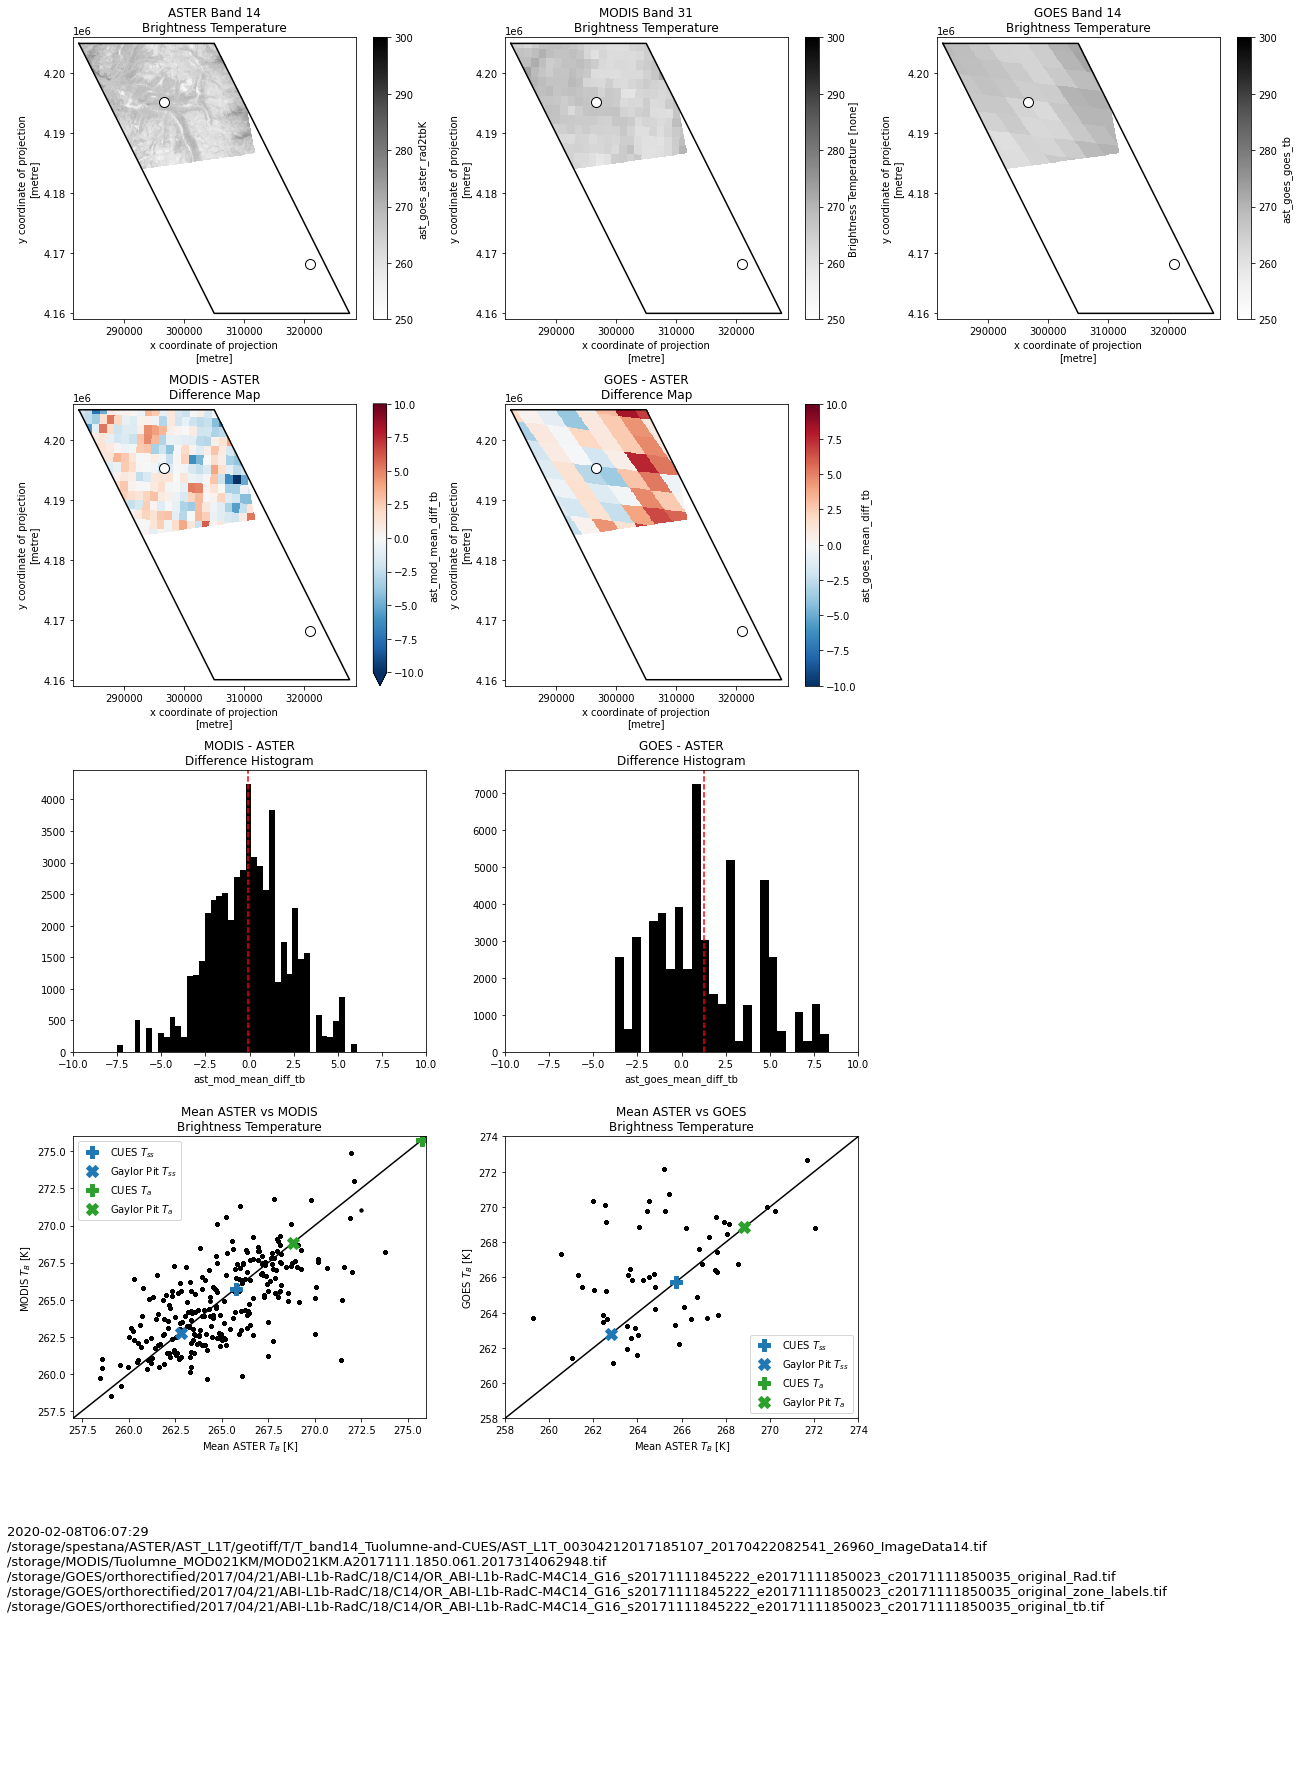

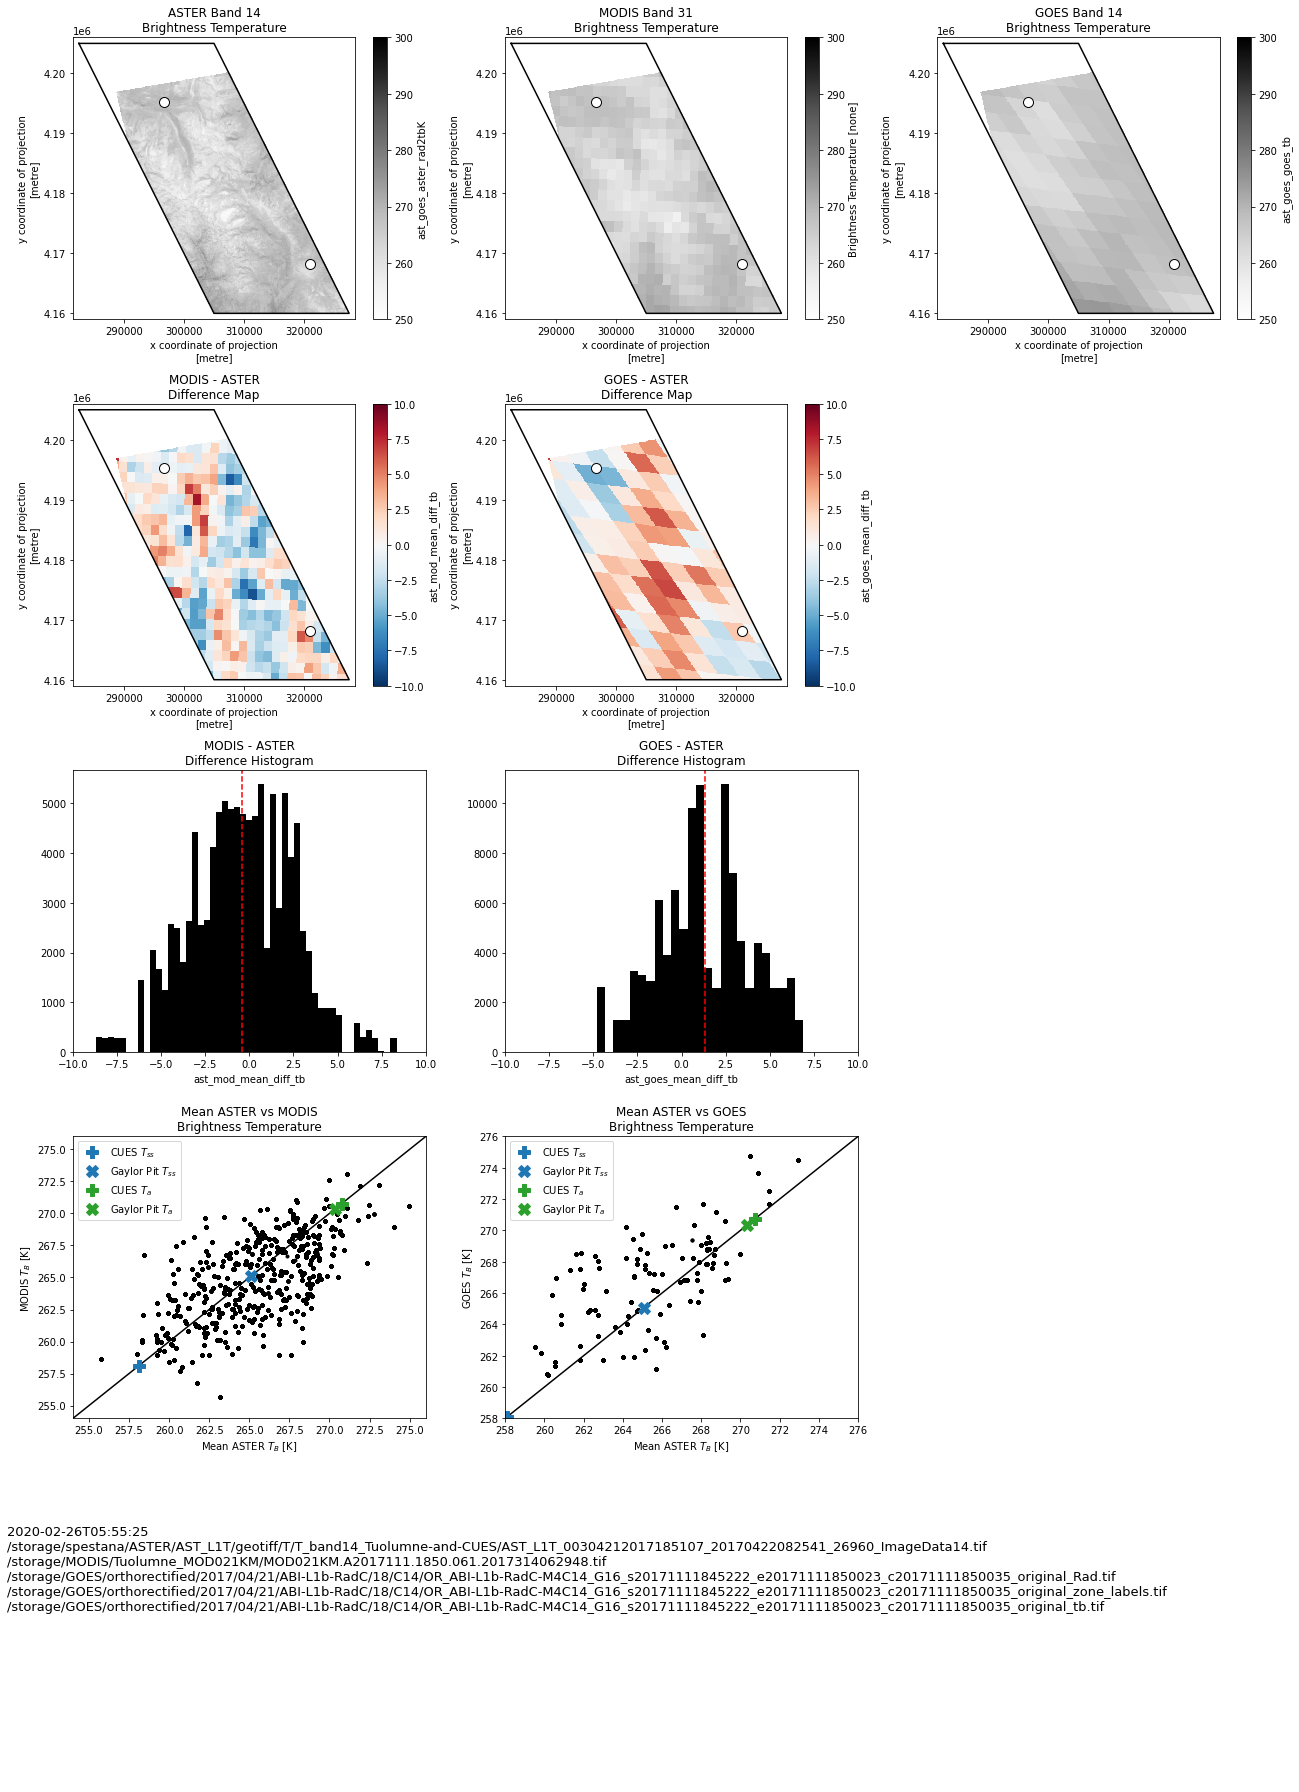

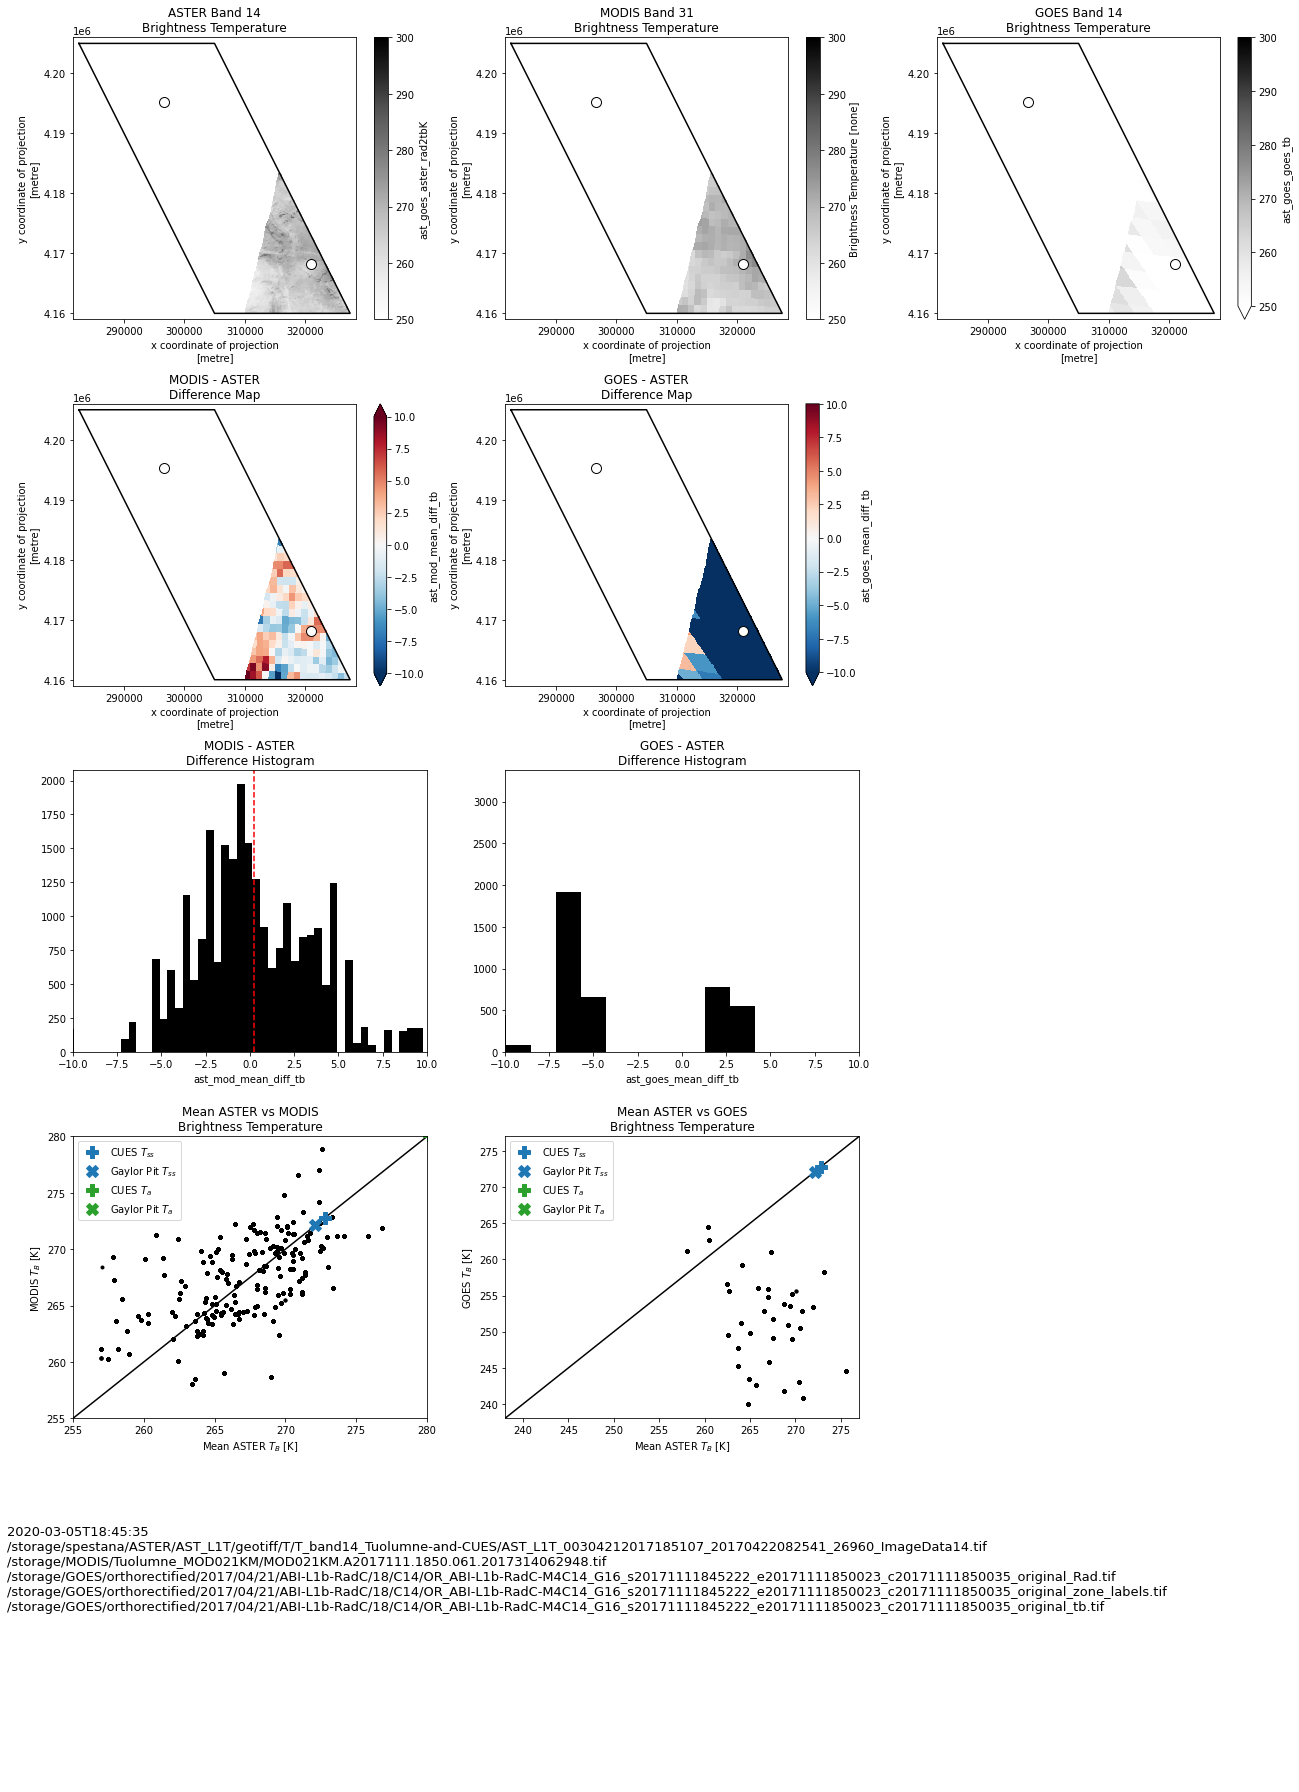

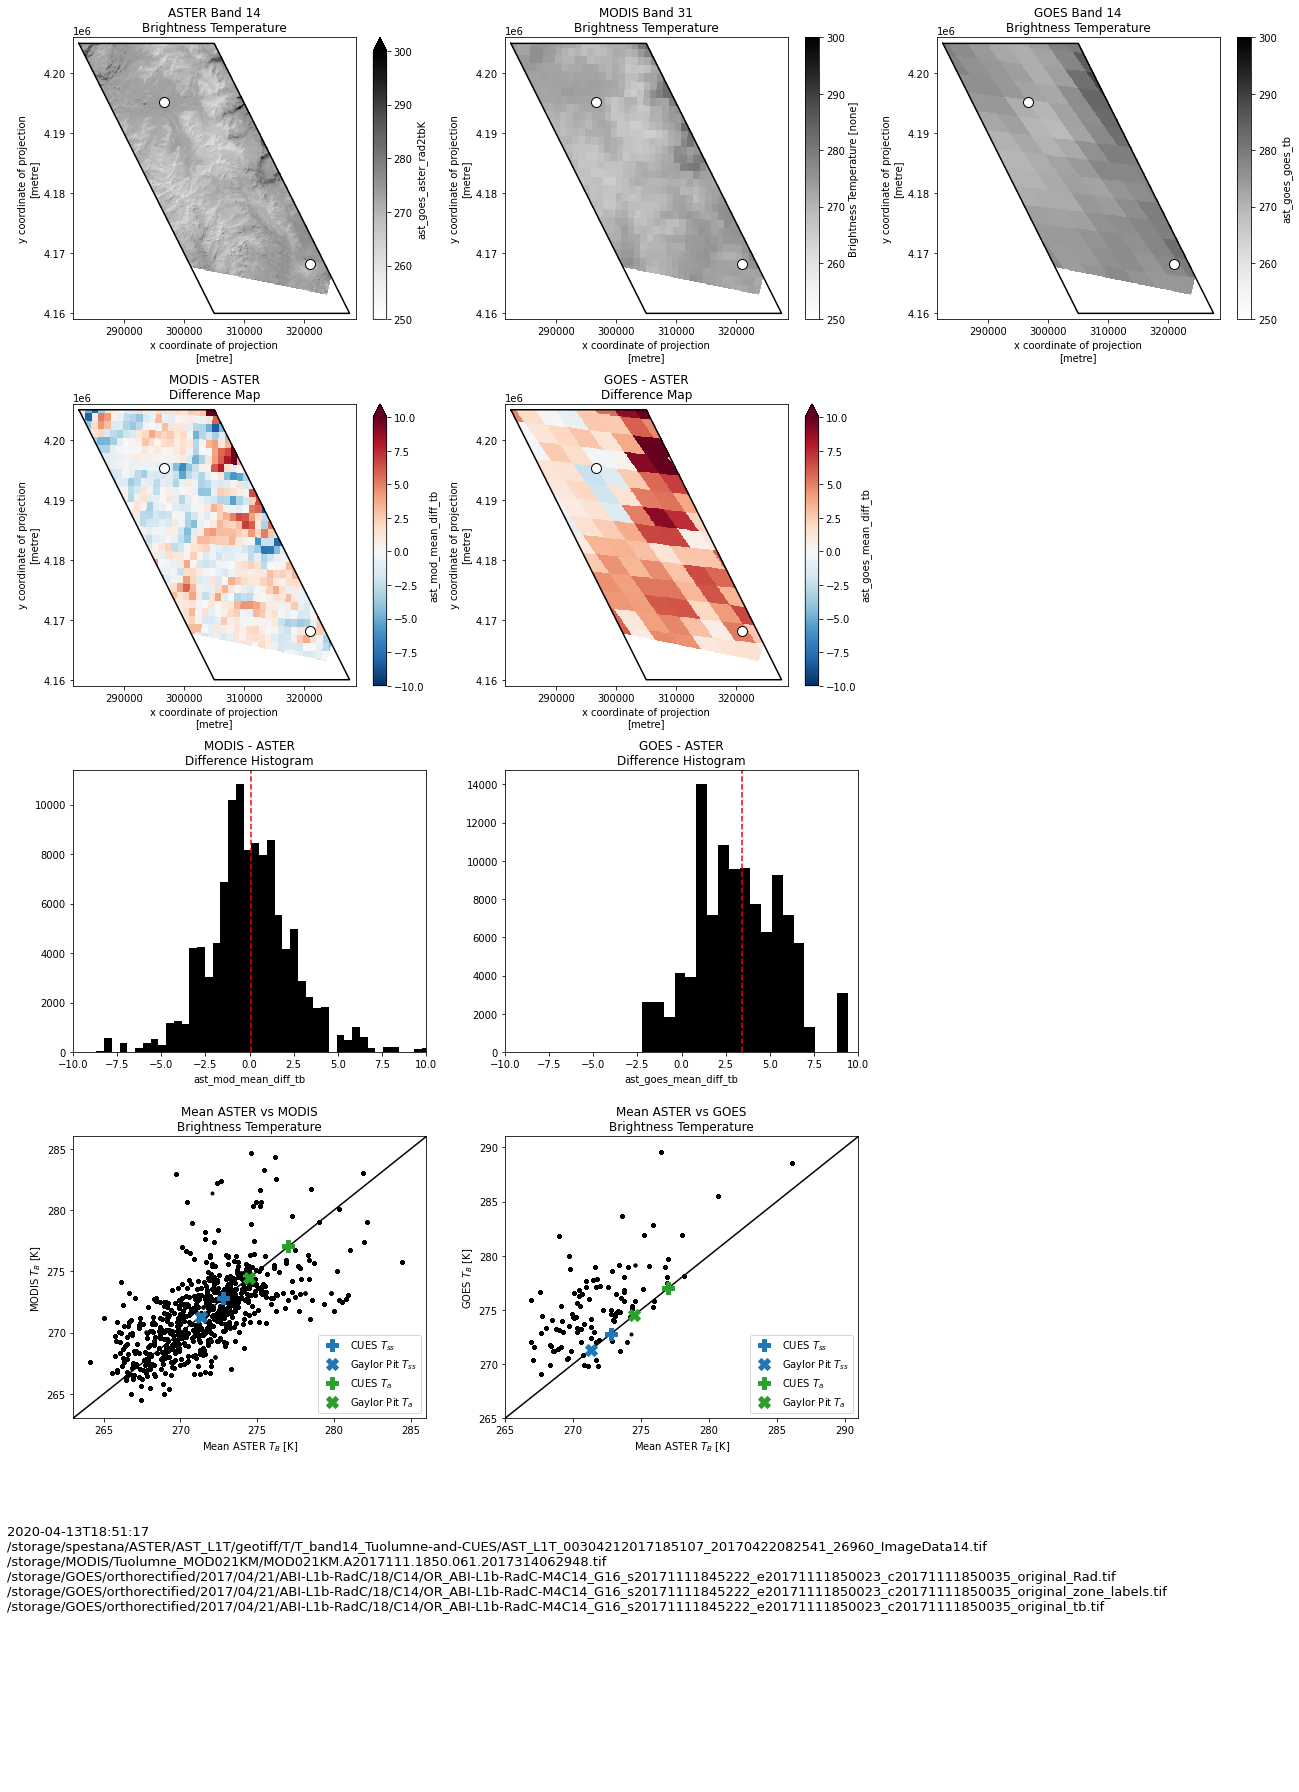

In [11]:
save_figure = True

summary_stats_list = []

for timestep_index in range(len(ds.time)):
    
    # Subset dataset to a single time slice
    _ds = ds.isel(time=timestep_index)
    
    ####################################################################################
    
    # Get the CUES and Gaylor Pit temperature observations that were taken at the same time as these satellite images
    print('Looking for {}'.format(ds.time[timestep_index].values))
    # CUES
    _cues_ds = cues_ds.sel(timeUTC=ds.time[timestep_index].values, method='nearest')
    print('Found for CUES: {}'.format(_cues_ds.timeUTC.values))
    this_cues_tss = _cues_ds['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)'].values
    this_cues_tair = _cues_ds['Platform temperature; platform temperature/relative humidity; (degrees Celsius)'].values
    #this_cues_rh = _cues_ds['Platform relative humidity; platform temperature/relative humidity; (percent)'].values
    
    # Gaylor Pit (Tuolumne)
    _tuol_ds = tuol_ds.sel(timeUTC=ds.time[timestep_index].values, method='nearest')
    print('Found for Gaylor Pit: {}'.format(_tuol_ds.timeUTC.values))
    this_tuol_tss = _tuol_ds.tss.values
    this_tuol_tair = _tuol_ds.air_temp_c.values    
       
    ####################################################################################
    
    fig = plt.figure(figsize=(18,25), tight_layout=True)
    
    ##### Format figure subplots with subplot2grid:
    ##### ax = subplot2grid((nrows, ncols), (row, col), rowspan, colspan)
    
    nrows = 5
    ncols = 3
    
    ax_aster_tb = plt.subplot2grid((nrows, ncols), (0, 0), 1, 1)
    ax_modis_tb = plt.subplot2grid((nrows, ncols), (0, 1),  1, 1)
    ax_goes_tb = plt.subplot2grid((nrows, ncols), (0, 2), 1, 1)
    
    ax_ast_mod_diff = plt.subplot2grid((nrows, ncols), (1, 0), 1, 1)
    ax_ast_goes_diff = plt.subplot2grid((nrows, ncols), (1, 1), 1, 1)
    blank = plt.subplot2grid((nrows, ncols), (1, 2), 1, 1)
    blank.set_axis_off()
    
    ax_ast_mod_hist = plt.subplot2grid((nrows, ncols), (2, 0), 1, 1)
    ax_ast_goes_hist = plt.subplot2grid((nrows, ncols), (2, 1), 1, 1)
    blank = plt.subplot2grid((nrows, ncols), (2, 2), 1, 1)
    blank.set_axis_off()
    
    ax_ast_mod_1to1 = plt.subplot2grid((nrows, ncols), (3, 0), 1, 1)
    ax_ast_goes_1to1 = plt.subplot2grid((nrows, ncols), (3, 1), 1, 1)
    blank = plt.subplot2grid((nrows, ncols), (3, 2), 1, 1)
    blank.set_axis_off()
        
    blank = plt.subplot2grid((nrows, ncols), (4, 0), 3, 1)
    blank.set_axis_off()
    
    ####################################################################################
    
    
    # make timestamp string for use in figure titles
    timestamp_str = str(_ds.time.values).split('.')[0]
    
    ### Plot the brightness temperature images ###
    # ASTER Tb
    _ds.ast_goes_aster_rad2tbK.plot(ax=ax_aster_tb, add_colorbar=True, cmap='Greys', vmin=250, vmax=300)
    ax_aster_tb.set_title('ASTER Band 14\nBrightness Temperature')
    # MODIS Tb
    _ds.ast_mod_modis_tb.plot(ax=ax_modis_tb, add_colorbar=True, cmap='Greys', vmin=250, vmax=300)
    ax_modis_tb.set_title('MODIS Band 31\nBrightness Temperature')
    # GOES Tb
    _ds.ast_goes_goes_tb.plot(ax=ax_goes_tb, add_colorbar=True, cmap='Greys', vmin=250, vmax=300)
    ax_goes_tb.set_title('GOES Band 14\nBrightness Temperature')

    ### Plot the difference maps for MODIS-ASTER, and GOES-ASTER ###
    _ds.ast_mod_mean_diff_tb.plot(ax=ax_ast_mod_diff, add_colorbar=True, cmap='RdBu_r', vmin=-10, vmax=10)
    ax_ast_mod_diff.set_title('MODIS - ASTER\nDifference Map')
    _ds.ast_goes_mean_diff_tb.plot(ax=ax_ast_goes_diff, add_colorbar=True, cmap='RdBu_r', vmin=-10, vmax=10)
    ax_ast_goes_diff.set_title('GOES - ASTER\nDifference Map')
    
    ### Plot the difference histograms for MODIS-ASTER, and GOES-ASTER ###
    _ds.ast_mod_mean_diff_tb.plot.hist(ax=ax_ast_mod_hist, bins=50, color='k')
    ax_ast_mod_hist.axvline(_ds.ast_mod_mean_diff_tb.mean(), color='r', linestyle='--') # mean line
    ax_ast_mod_hist.set_title('MODIS - ASTER\nDifference Histogram')
    _ds.ast_goes_mean_diff_tb.plot.hist(ax=ax_ast_goes_hist, bins=25, color='k')
    ax_ast_goes_hist.axvline(_ds.ast_goes_mean_diff_tb.mean(), color='r', linestyle='--') # mean line
    ax_ast_goes_hist.set_title('GOES - ASTER\nDifference Histogram')
    # Format the axes limits on the histograms
    for ax in [ax_ast_mod_hist, ax_ast_goes_hist]:
        ax.set_xlim(-10,10)
        #ax.set_ylim()
    
    ### Plot 1-to-1 for MODIS vs ASTER and GOES vs ASTER ##
    # ASTER and MODIS
    ax_ast_mod_1to1.plot(_ds.ast_mod_mean_rad2tbK, _ds.ast_mod_modis_tb, # aggregated ASTER vs MODIS
                          linestyle='none', marker='.', color='k', alpha=1)
    #ax_ast_mod_1to1.plot(_ds.ast_mod_aster_rad2tbK, _ds.ast_mod_modis_tb, # subpixel ASTER vs MODIS
    #                      linestyle='none', marker='.', color='k', alpha=1)
    ax_ast_mod_1to1.set_title('Mean ASTER vs MODIS\nBrightness Temperature')
    ax_ast_mod_1to1.set_xlabel('Mean ASTER $T_B$ [K]')
    ax_ast_mod_1to1.set_ylabel('MODIS $T_B$ [K]')
    # ASTER and GOES
    ax_ast_goes_1to1.plot(_ds.ast_goes_mean_rad2tbK, _ds.ast_goes_goes_tb, # aggregated ASTER vs GOES
                          linestyle='none', marker='.', color='k', alpha=1)
    #ax_ast_goes_1to1.plot(_ds.ast_goes_aster_rad2tbK, _ds.ast_goes_goes_tb, # subpixel ASTER vs GOES
    #                      linestyle='none', marker='.', color='k', alpha=1)
    ax_ast_goes_1to1.set_title('Mean ASTER vs GOES\nBrightness Temperature')
    ax_ast_goes_1to1.set_xlabel('Mean ASTER $T_B$ [K]')
    ax_ast_goes_1to1.set_ylabel('GOES $T_B$ [K]')
    
    ### Summary Stats ###
    summary_stats_ast_mod = summary_stats(_ds.ast_mod_mean_rad2tbK.values.ravel(), _ds.ast_mod_modis_tb.values.ravel())
    summary_stats_ast_subpx_mod = summary_stats(_ds.ast_mod_aster_rad2tbK.values.ravel(), _ds.ast_mod_modis_tb.values.ravel())
    summary_stats_ast_goes = summary_stats(_ds.ast_goes_mean_rad2tbK.values.ravel(), _ds.ast_goes_goes_tb.values.ravel())
    summary_stats_ast_subpx_goes = summary_stats(_ds.ast_goes_aster_rad2tbK.values.ravel(), _ds.ast_goes_goes_tb.values.ravel())
    # compile summary stats into a pandas dataframe
    # Update key names
    _summary_stats_ast_mod = { 'ast_mod_'+k: v for k, v in summary_stats_ast_mod.items() }
    _summary_stats_ast_subpx_mod = { 'ast_subpx_mod_'+k: v for k, v in summary_stats_ast_subpx_mod.items() }
    _summary_stats_ast_goes = { 'ast_goes_'+k: v for k, v in summary_stats_ast_goes.items() }
    _summary_stats_ast_subpx_goes = { 'ast_subpx_goes_'+k: v for k, v in summary_stats_ast_subpx_goes.items() }
    # merge all three dictionaries together with some other data values
    summary_stats_dict = {'time' : _ds.time.values,
                          'aster_rad_filepath': _ds.attrs['aster_rad_filepath'],
                          'modis_rad_filepath': _ds.attrs['modis_rad_filepath'],
                          'goes_rad_filepath': _ds.attrs['goes_rad_filepath'],
                          'goes_zones_filepath': _ds.attrs['goes_zones_filepath'],
                          'goes_tb_filepath': _ds.attrs['goes_tb_filepath'],
                          **_summary_stats_ast_mod, **_summary_stats_ast_subpx_mod,
                          **_summary_stats_ast_goes, **_summary_stats_ast_subpx_goes}    
    
        
    # append summary stats to list of all summary stats
    summary_stats_list.append(summary_stats_dict)
    

    
    # 1-to-1 plots and axes formatting
    for ax_1_to_1 in [ax_ast_mod_1to1, ax_ast_goes_1to1]:
        # get max and min values for axes
        (ax_min, ax_max) = (int(np.floor( np.min( [ax_1_to_1.get_xlim()[0], ax_1_to_1.get_ylim()[0]] ) )), 
                            int(np.ceil( np.max( [ax_1_to_1.get_xlim()[1], ax_1_to_1.get_ylim()[1]] ) )) )
        # add 1-to-1 line
        ax_1_to_1.plot([ax_min,ax_max],[ax_min,ax_max],'k-')
        # set axes limits
        ax_1_to_1.set_xlim((ax_min,ax_max))
        ax_1_to_1.set_ylim((ax_min,ax_max))
    
    # Add Gaylor Pit and CUES temperatures to 1-to-1 plots, along the 1-to-1 line:
    for ax_1_to_1 in [ax_ast_mod_1to1, ax_ast_goes_1to1]:
        ax_1_to_1.plot(this_cues_tss+273.15, this_cues_tss+273.15, color='tab:blue', linestyle='none', marker='P', markersize=12, label='CUES $T_{ss}$')
        ax_1_to_1.plot(this_tuol_tss+273.15, this_tuol_tss+273.15, color='tab:blue', linestyle='none', marker='X', markersize=12, label='Gaylor Pit $T_{ss}$')
        ax_1_to_1.plot(this_cues_tair+273.15, this_cues_tair+273.15, color='tab:green', linestyle='none', marker='P', markersize=12, label='CUES $T_a$')
        ax_1_to_1.plot(this_tuol_tair+273.15, this_tuol_tair+273.15, color='tab:green', linestyle='none', marker='X', markersize=12, label='Gaylor Pit $T_a$')
        ax_1_to_1.legend()
        
    # Plot an outline of the study area, and Gaylor Pit and CUES markers on the map axes
    for ax in [ax_aster_tb, ax_modis_tb, ax_goes_tb, ax_ast_mod_diff, ax_ast_goes_diff]:
        ax.set_xlim((utm_e_UL-1000,utm_e_LR+1000))
        ax.set_ylim((utm_n_LR-1000,utm_n_UL+1000))
        
        ax.scatter(296649, 4195210, 
                            marker='o', 
                            edgecolor='k', 
                            facecolor='w', 
                            s=100, 
                            label='Gaylor Pit')
        ax.scatter(320971, 4168153, 
                            marker='o', 
                            edgecolor='k', 
                            facecolor='w', 
                            s=100, 
                            label='CUES')
        ax.plot([utm_e_UL, utm_e_UR, utm_e_LR, utm_e_LL, utm_e_UL],
                         [utm_n_UL, utm_n_UR, utm_n_LR, utm_n_LL, utm_n_UL],
                         linestyle='-', color='k')
        
        

    # add title at bottom of figure    
    fig.suptitle('{}\n{}\n{}\n{}\n{}\n{}'.format(timestamp_str,
                                         _ds.attrs['aster_rad_filepath'],
                                         _ds.attrs['modis_rad_filepath'],
                                         _ds.attrs['goes_rad_filepath'],
                                         _ds.attrs['goes_zones_filepath'],
                                         _ds.attrs['goes_tb_filepath']),
                x=0, y=0.15, ha='left', fontsize=13);
    
    filename_friendly_timestamp_str = timestamp_str.replace(':','')
    if save_figure == True:
        #plt.savefig('./images/ASTER_MODIS_GOES/upscaled_comparisons/ASTER_MODIS_GOES_orthorectified_{}.jpg'.format(filename_friendly_timestamp_str))
        plt.savefig('./images/ASTER_MODIS_GOES/upscaled_comparisons/ASTER_MODIS_GOES_original_{}.jpg'.format(filename_friendly_timestamp_str))

#### Make pandas dataframe from summary stats dictionaries
summary_stats_df = pd.DataFrame(summary_stats_list)
# save out to csv file
#summary_stats_df.to_csv('goes_modis_aster_orthorectified_tb_summary_stats.csv')
#summary_stats_df.to_csv('goes_modis_aster_original_tb_summary_stats.csv')